![logo](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sbu-logo.svg)

# Assignment 2
### Mehrdad Baradaran (99222020)
### [vehicle Insurance Claim Fraud Detection dataset](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?resource=download)

Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

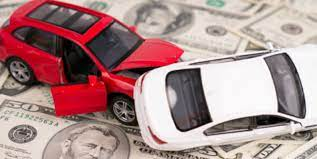

## Outline
- Data analysis
- Using different models
    - Logistic Regression
    - SVM
    - Decision-Trees
    - Random Forest
    - KNN
    - Naive Bayes
    
    
- Use stratified cross-validation
- Check whether this dataset is imbalanced or not
- Try to boost the performance of the SVM and Random Forest


<div class="alert alert-block alert-info">
<b>Importing Libraries:</b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>Loading data:</b> 
</div>

In [2]:
import pandas as pd

df = pd.read_csv(r'fraud_oracle.csv')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.shape

(15420, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Amongst the column list above most of the column seems categorical, apart from deductible. Since we are trying to model the fraudulent transaction the " FraudFound_P" is our target variable which is binary.
Amongst the numeric features week of month, week of month claimed, fraud found, driver rating seems categorical and since policy number, rep number are distinct values,they need to be converted to string


In [7]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
# Verifying the number of missing values in each feature
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

### Data looks pretty clean without any missing values

In [9]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

<div class="alert alert-block alert-danger">
<b>Explanatory Data Analysis:</b> 
</div>

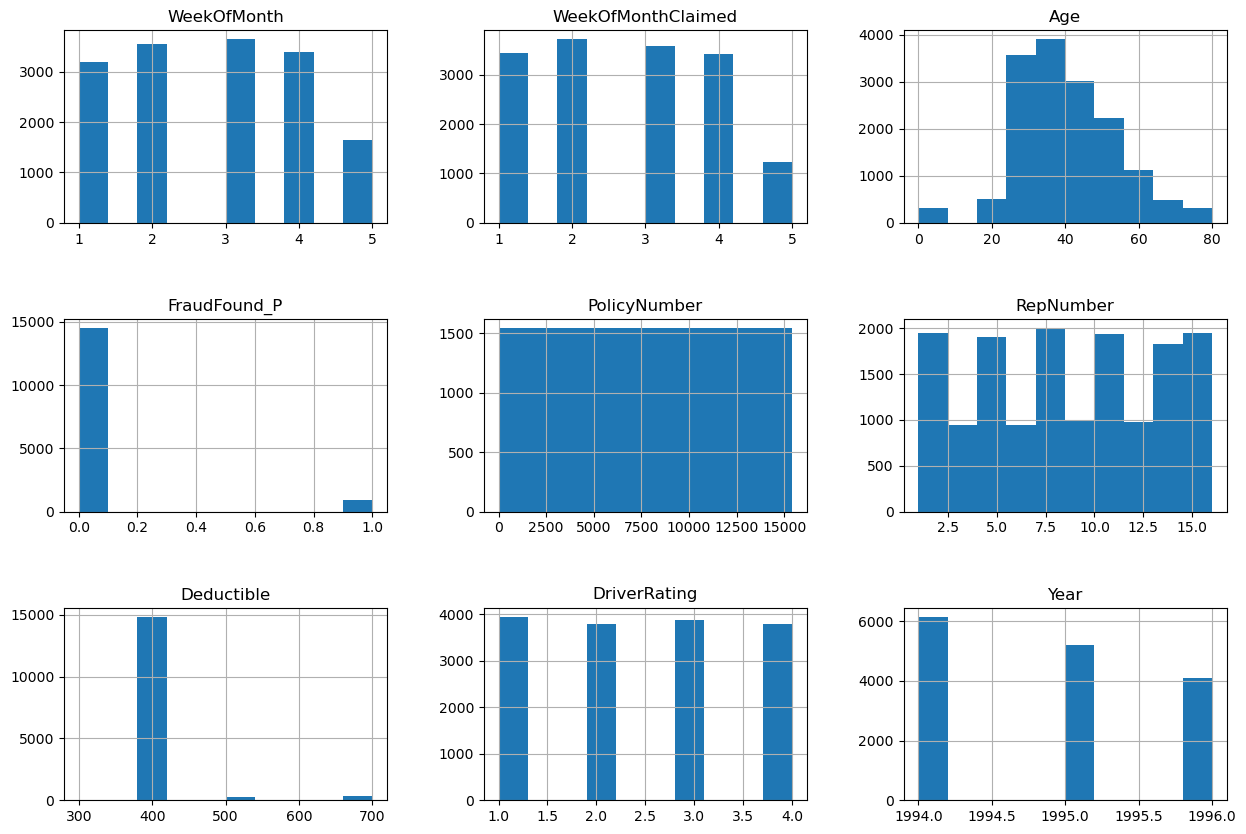

In [10]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

1. Policy numbers looks randomly distributed, may be it is just a serial number
2. Most of the deductibles are in 3 categories. Most commonly involved in claims is 400
3. Driver Rating are somewhat equally distributed
4. Fraudulent claims have very small proportion
5. Only 3 years of cars showing in the data and year 1994 ( older cars) have more involvement in accidents¶

### Checking the distribution of Categorical Columns
1. Month

In [11]:
item_counts = df['Month'].value_counts(normalize=True)
print(item_counts*100)

Jan    9.150454
May    8.865110
Mar    8.819715
Jun    8.566796
Oct    8.463035
Dec    8.333333
Apr    8.300908
Feb    8.210117
Jul    8.151751
Sep    8.041505
Nov    7.788586
Aug    7.308690
Name: Month, dtype: float64


In [12]:
df_month = df.groupby(['Month']).size().reset_index().rename(columns={0:'Num_accidents'})
df_month

,Month,Num_accidents
0,Apr,1280
1,Aug,1127
2,Dec,1285
3,Feb,1266
4,Jan,1411
5,Jul,1257
6,Jun,1321
7,Mar,1360
8,May,1367
9,Nov,1201


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1643968958.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='Month',stat="probability",palette = 'hls',data = df)


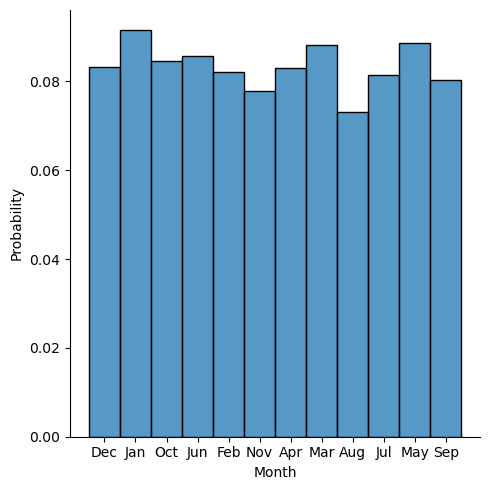

In [13]:
sns.displot(x ='Month',stat="probability",palette = 'hls',data = df)
plt.tight_layout()
plt.show()

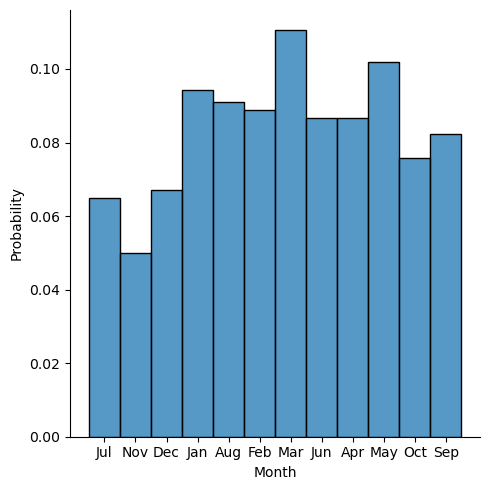

In [14]:
df2=df.loc[df['FraudFound_P']==1]
sns.displot(x ='Month',stat="probability",data = df2)
plt.tight_layout()
plt.show()

#### Amongst fraudulent cases months of March and May has relatively higher probablity

Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\187481636.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = 'Month', y = 'FraudFound_P', data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\187481636.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Month']).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\187481636.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Month']).std()['FraudFound_P'])


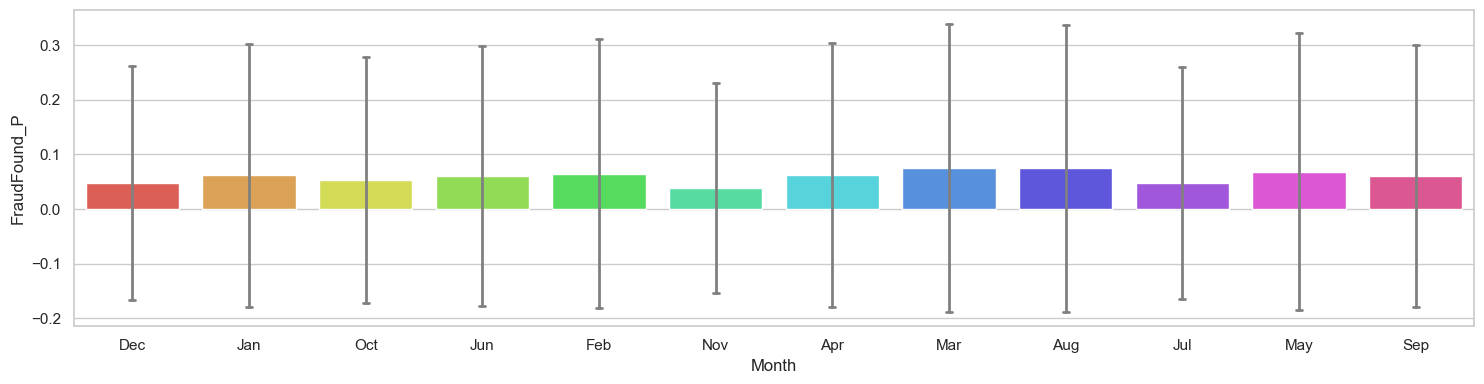

In [15]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Month', y = 'FraudFound_P', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(df.groupby(['Month']).mean()['FraudFound_P'])
print(df.groupby(['Month']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

2. Make of the vehicle

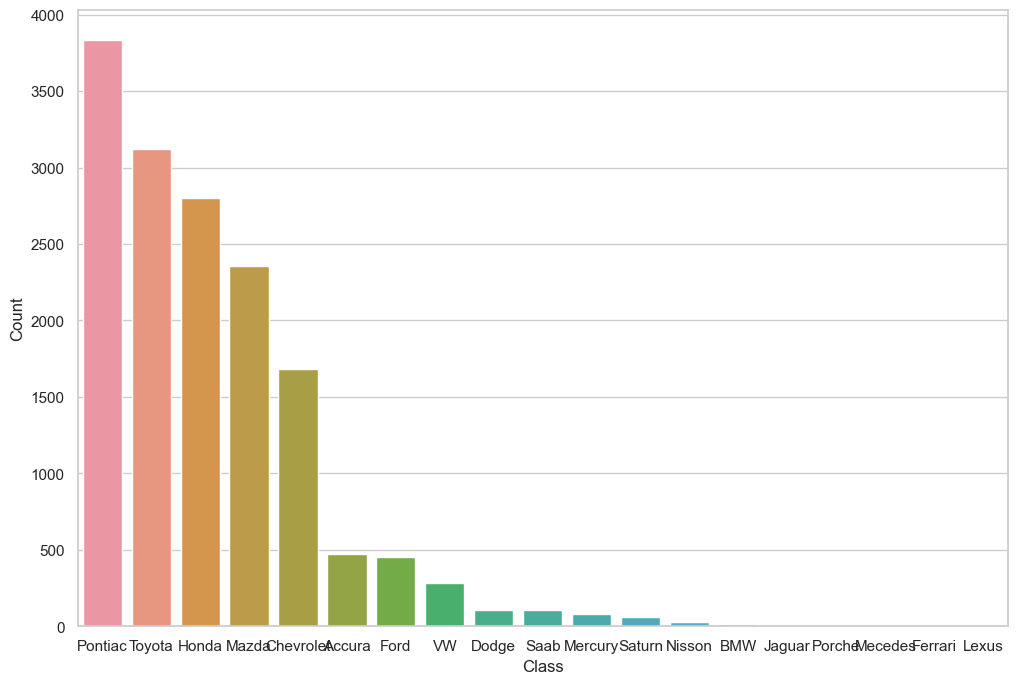

In [16]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="Make",order=df['Make'].value_counts().index ,data=df)
ax3.set(xlabel='Class', ylabel='Count')


plt.show()

#### Pontiac, Toyota, Honda, Mazda and Chevrolet are the top 5 makes involved in claims

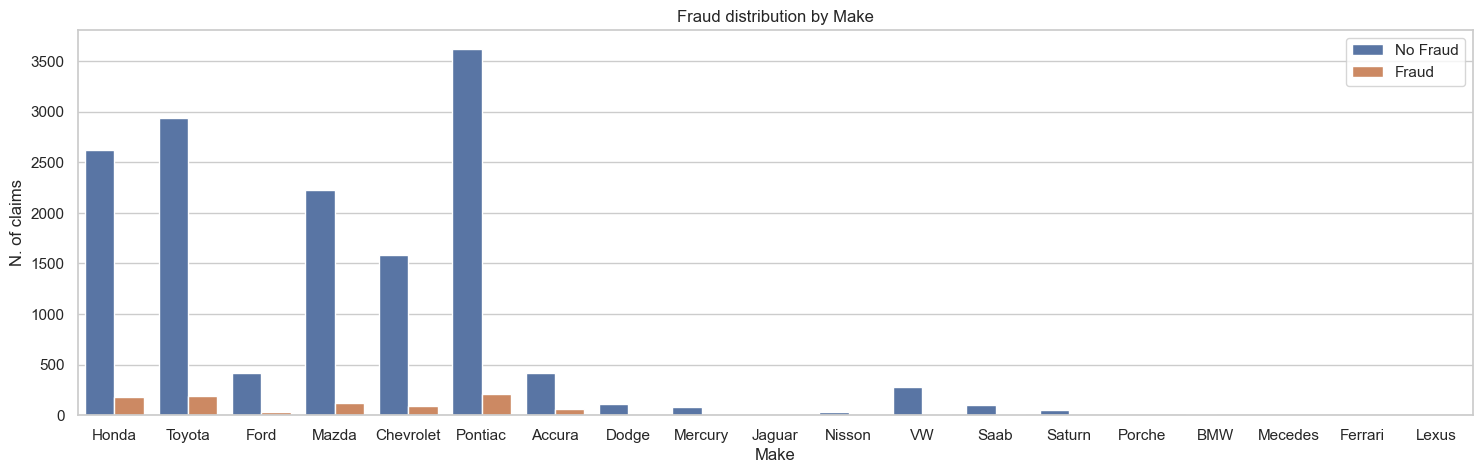

In [17]:
plt.figure(figsize=(18, 5))

df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]

sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)

labels = ['No Fraud', 'Fraud']
plt.legend(labels)
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('N. of claims')
plt.show()

Make
Accura       0.125000
BMW          0.066667
Chevrolet    0.055919
Dodge        0.018349
Ferrari      0.000000
Ford         0.073333
Honda        0.063906
Jaguar       0.000000
Lexus        0.000000
Mazda        0.052251
Mecedes      0.250000
Mercury      0.072289
Nisson       0.033333
Pontiac      0.055512
Porche       0.000000
Saab         0.101852
Saturn       0.103448
Toyota       0.059596
VW           0.028269
Name: FraudFound_P, dtype: float64
Make
Accura       0.331070
BMW          0.258199
Chevrolet    0.229834
Dodge        0.134829
Ferrari      0.000000
Ford         0.260973
Honda        0.244629
Jaguar       0.000000
Lexus             NaN
Mazda        0.222581
Mecedes      0.500000
Mercury      0.260540
Nisson       0.182574
Pontiac      0.229007
Porche       0.000000
Saab         0.303863
Saturn       0.307203
Toyota       0.236775
VW           0.166033
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1782760979.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = 'Make', y = 'FraudFound_P', data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1782760979.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Make']).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1782760979.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Make']).std()['FraudFound_P'])


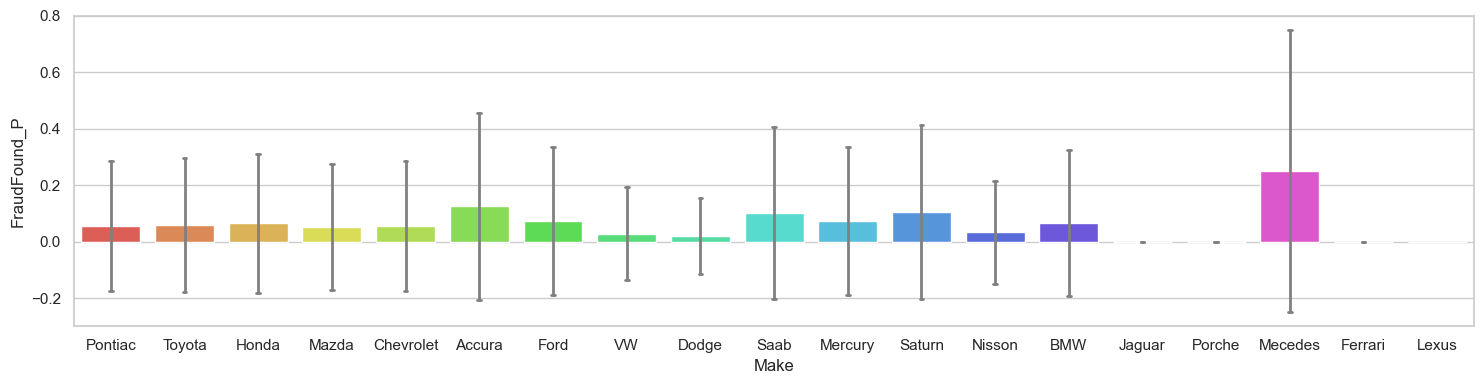

In [18]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Make', y = 'FraudFound_P', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,
            order=df['Make'].value_counts().index,
            ci = 'sd'   
            )

print(df.groupby(['Make']).mean()['FraudFound_P'])
print(df.groupby(['Make']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

#### Surprisingly the highest probablity of fraudulent transactions is in high end cars like Accura and Mercedes, most likely due to higher incentive for frauds as the cars being costlier

3. contribution of sex type

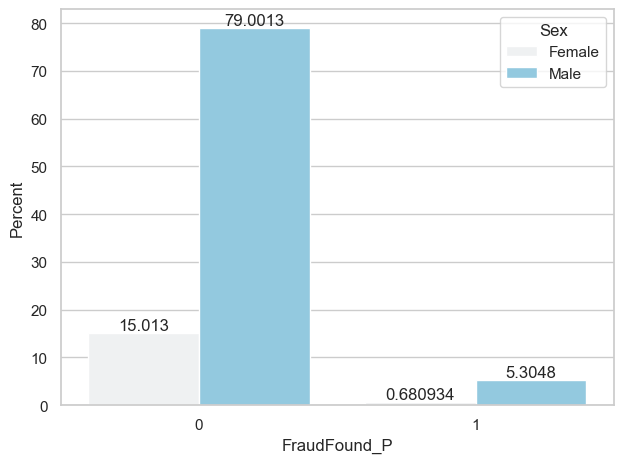

In [19]:
sns.set(style="whitegrid")
ax=sns.barplot(data=df,x='FraudFound_P', y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

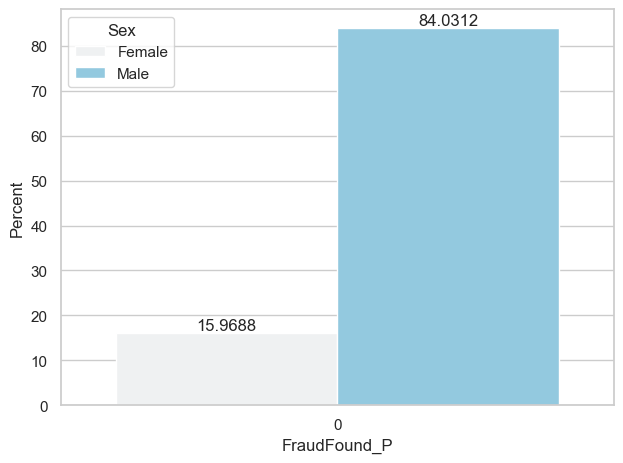

In [20]:
df1=df.loc[df['FraudFound_P']==0]
sns.set(style="whitegrid")  
ax=sns.barplot(data=df1,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(df1) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
    plt.tight_layout()
plt.show()

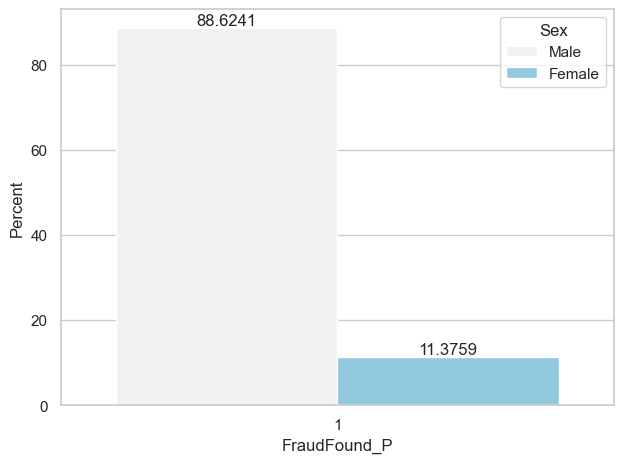

In [21]:
df2=df.loc[df['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=df2,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(df2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

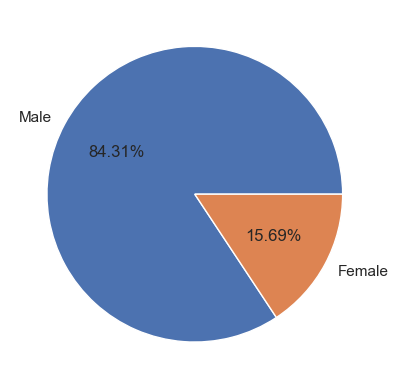

In [22]:
Sex = df['Sex'].value_counts() 
labels = ['Male','Female']
plt.pie(Sex,labels = labels, autopct = '%1.2f%%')
plt.show()

#### Amongst the total claims males contribute 84.03% for non-fraudulent transactions but contribute 88.62% of fraudulent transactions. Males are more likely to submit fraudulent claims

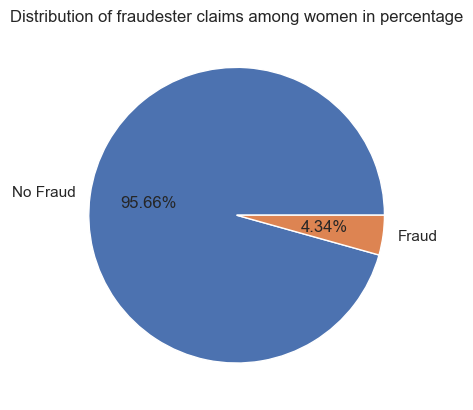

In [23]:
df_fem = df[(df['Sex']=='Female')]
Fem = df_fem['FraudFound_P'].value_counts() 
plt.title('Distribution of fraudester claims among women in percentage')
labels = ['No Fraud','Fraud']
plt.pie(Fem, labels = labels, autopct = '%1.2f%%')
plt.show()

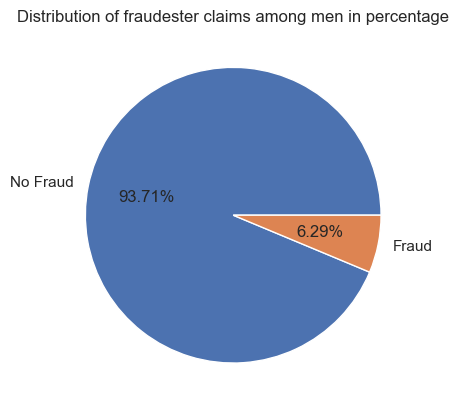

In [24]:
df_male = df[(df['Sex']=='Male')]
Male = df_male['FraudFound_P'].value_counts() 
plt.title('Distribution of fraudester claims among men in percentage')
labels = ['No Fraud','Fraud']
plt.pie(Male, labels = labels, autopct = '%1.2f%%')
plt.show()

4. DayOfWeek

In [25]:
WeekDays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [26]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Date'] = pd.Categorical(df['DayOfWeek'], categories=cats, ordered=True)
df = df.sort_values('Date')

In [27]:
FraudByDay = df[['DayOfWeek','FraudFound_P']]. groupby(['DayOfWeek','FraudFound_P']).size().reset_index()#.reindex(WeekDays)#.rename(columns = {0: 'Num_of_claims'})
FraudByDay

,DayOfWeek,FraudFound_P,0
0,Friday,0,2291
1,Friday,1,154
2,Monday,0,2456
3,Monday,1,160
4,Saturday,0,1850
5,Saturday,1,132
6,Sunday,0,1623
7,Sunday,1,122
8,Thursday,0,2053
9,Thursday,1,120


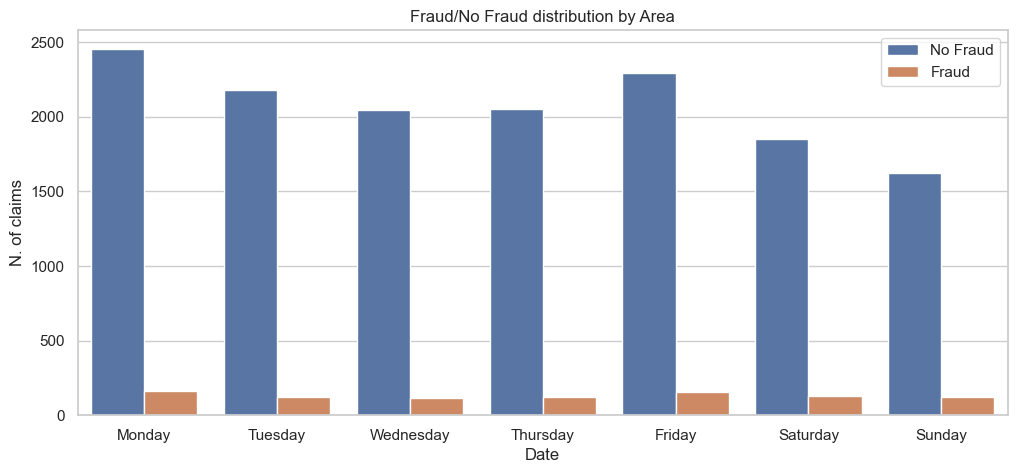

In [28]:
plt.figure(figsize=(12, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Date", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

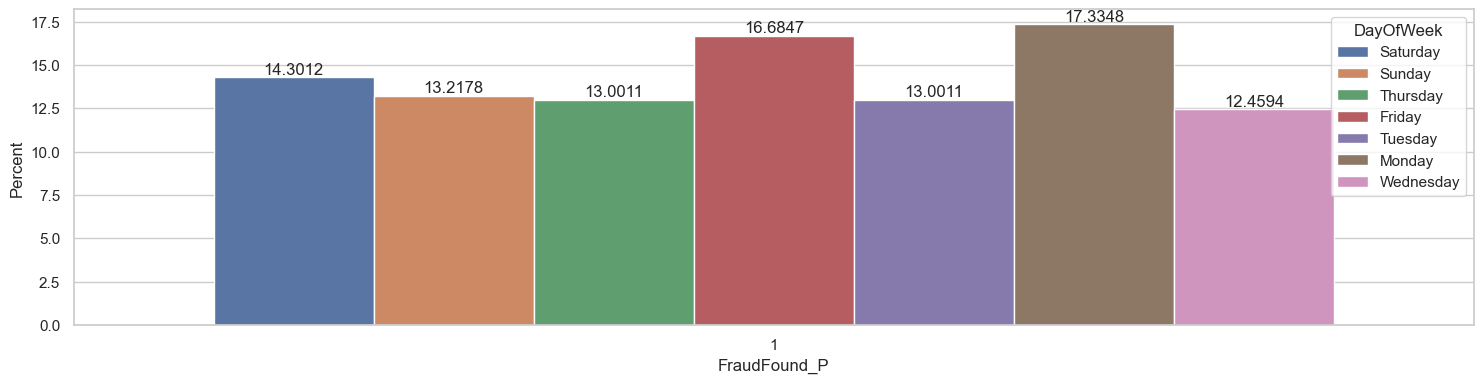

In [29]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=df2,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(df2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

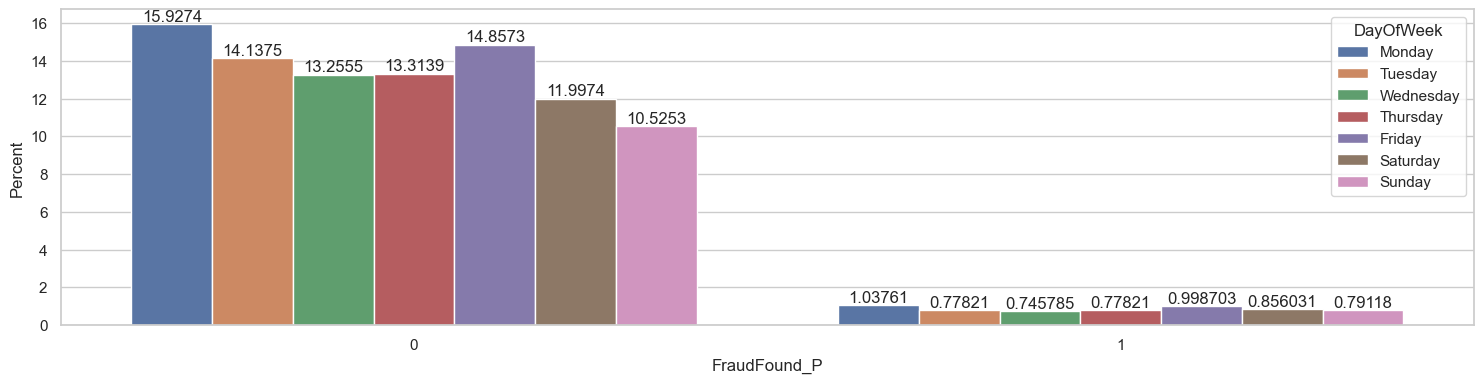

In [30]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=df,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

Percentage of fraudulent transacitons is higher on Monday and Friday. Similarly, the number of claims is also higher for Monday and Friday. Probably due to hurry to go to work on Monday or coming back Friday Evening. But we do not have any time data

5. week of month

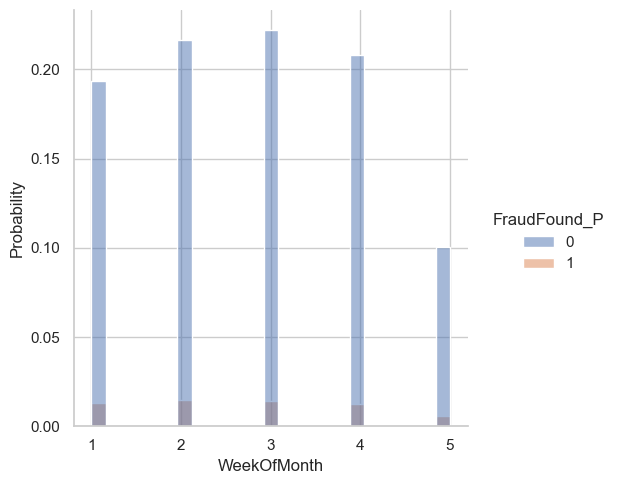

In [31]:
sns.displot(x ='WeekOfMonth', hue = "FraudFound_P",stat="probability",data = df)
 
# Show the plot
plt.show()

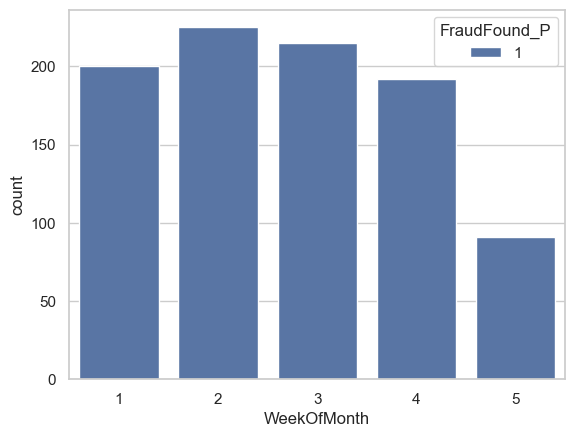

In [32]:
sns.countplot(x ='WeekOfMonth', hue = "FraudFound_P", data = df2)
 
# Show the plot
plt.show()

6. Age

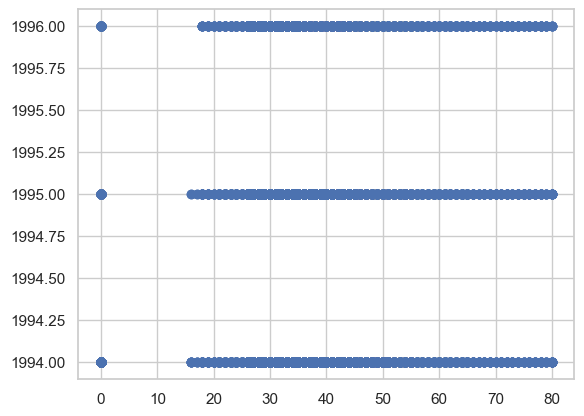

In [33]:
plt.scatter(df['Age'], df['Year'])

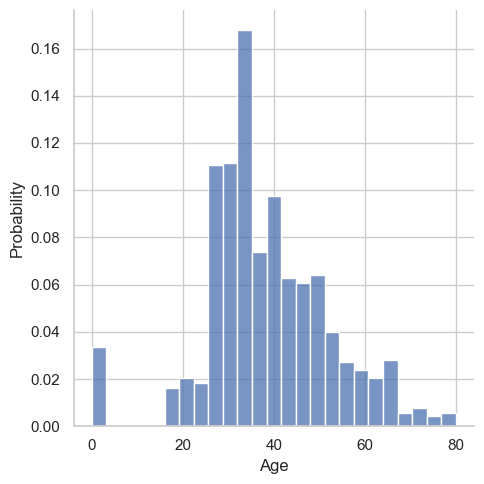

In [34]:
sns.displot(x ='Age',stat="probability",data = df2)
 
# Show the plot
plt.show()

There are several readings for age=0, which canot be driver .At this point we are not sure what that age column is. Interesting observation is the distribution of age groups and it seems like most case are clustered between age 20 and 60 with significant increase in fraudulent activities for age group 30 to40

### Checking value counts for age <20 as several values are showing 0 age

In [35]:
df4=df.loc[df['Age']<20]
df4['Age'].value_counts()

0     320
18     48
19     32
16      9
17      6
Name: Age, dtype: int64

7. Vehicle category

Sex     VehicleCategory
Female  Sedan              0.066387
        Sport              0.010121
        Utility            0.000000
Male    Sedan              0.084951
        Sport              0.016934
        Utility            0.112821
Name: FraudFound_P, dtype: float64
Sex     VehicleCategory
Female  Sedan              0.249045
        Sport              0.100146
        Utility                 NaN
Male    Sedan              0.278826
        Sport              0.129038
        Utility            0.316780
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1205321108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1205321108.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Sex', 'VehicleCategory']).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1205321108.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['Sex', 'VehicleCategory']).std()['FraudFound_P'])


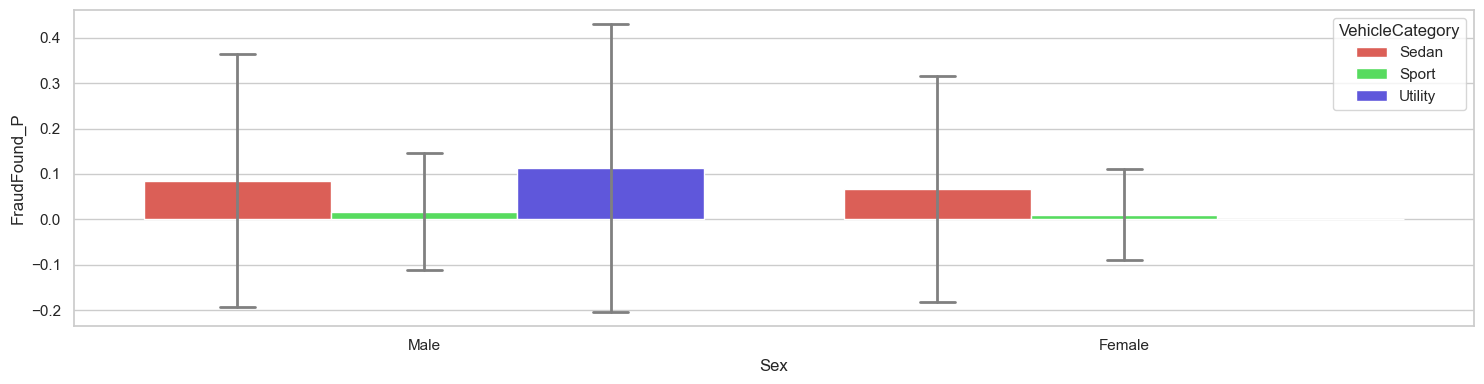

In [36]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = df,
            palette = 'hls',
            order = ['Male', 'Female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(df.groupby(['Sex', 'VehicleCategory']).mean()['FraudFound_P'])
print(df.groupby(['Sex', 'VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

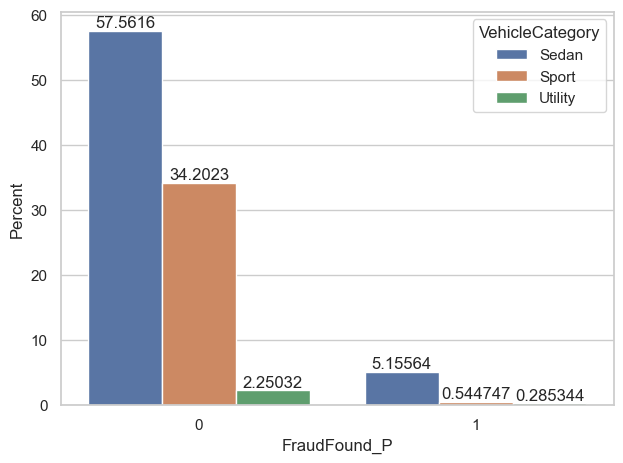

In [37]:
sns.set(style="whitegrid") 
ax=sns.barplot(data=df,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

One thing which stands out is , that sports vehicles are less likely to be involved in fraud. Most of the claims are coming from sedans. But they are driven the most also. Utility Vehicle involved in claims have 0.11% probable on an average to have fraudulent claims where as sports vehicles are only 0.02% likely to be involved in false claims
VehicleCategory

Sedan 0.082205

Sport 0.015677

Utility 0.112532

8. Accident Area

In [38]:
df.groupby(['AccidentArea']).size().reset_index().rename(columns={0:'Num_accidents'})

,AccidentArea,Num_accidents
0,Rural,1598
1,Urban,13822


In [39]:
Urban_claims=df.loc[df['AccidentArea']=='Urban'].groupby(['FraudFound_P']).size().reset_index().rename(index = {0:'No_Fraud',1:'Fraud'}, columns={0:'Num_accidents'})

Urban_claims

,FraudFound_P,Num_accidents
No_Fraud,0,13032
Fraud,1,790


In [40]:
Rural_claims=df.loc[df['AccidentArea']=='Rural'].groupby(['FraudFound_P']).size().reset_index().rename(index = {0:'No_Fraud',1:'Fraud'}, columns={0:'Num_accidents'})

Rural_claims

,FraudFound_P,Num_accidents
No_Fraud,0,1465
Fraud,1,133


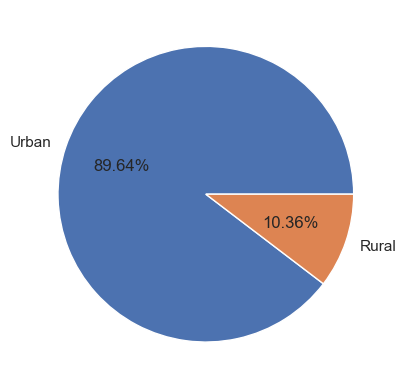

In [41]:
Accident_area = df.AccidentArea.value_counts().values
labels = ['Urban','Rural']
plt.pie(Accident_area, labels = labels, autopct = '%1.2f%%')
plt.show()

##### Accidents occur more frequently in Urban areas (90% of times) than in Rural areas (10% of times)

In [42]:
cats = ['Rural', 'Urban']
df['AreaType'] = pd.Categorical(df['AccidentArea'], categories=cats, ordered=True)
df = df.sort_values('AreaType')

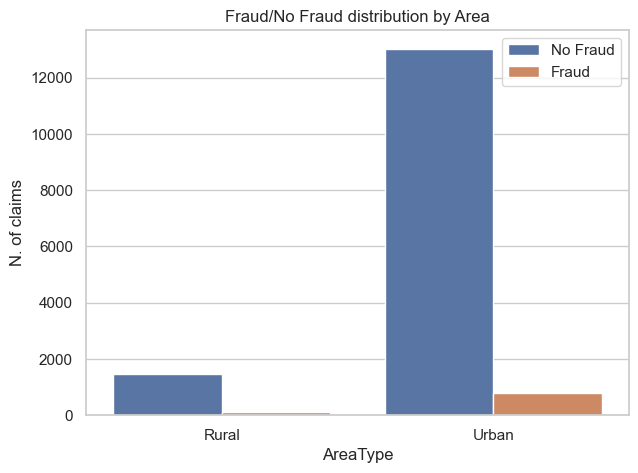

In [43]:
df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]
plt.figure(figsize=(7,5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="AreaType", hue ='FraudFound_P', data=df)


plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

##### Since more claims occur in Urban areas, even frauds are more frequent in cities

9. DriverRating

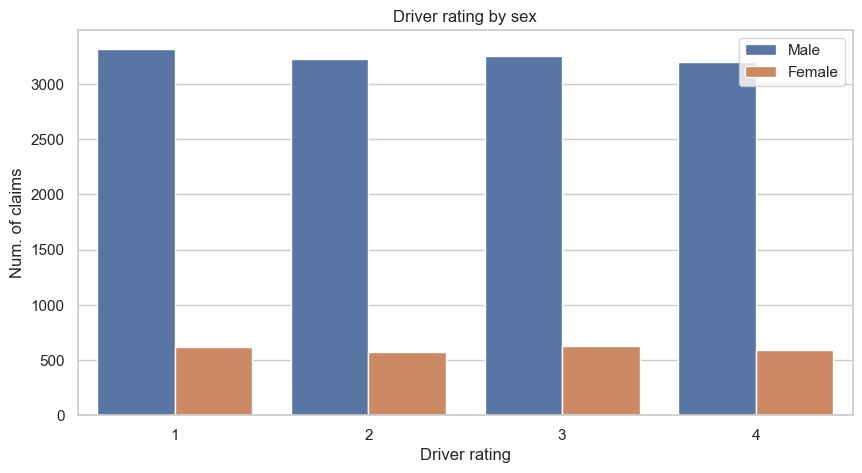

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'DriverRating', hue = 'Sex', data = df)

plt.legend(labels = ['Male','Female'], loc = 'upper right')
plt.ylabel('Num. of claims')
plt.xlabel('Driver rating')
plt.title('Driver rating by sex')
plt.show()

#### the four driver rating classe are almost equally populated both among men and among women

10. Marital Status

In [45]:
df['MaritalStatus'].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [46]:
df.groupby(['MaritalStatus', 'FraudFound_P']).size().reset_index().head(10)

,MaritalStatus,FraudFound_P,0
0,Divorced,0,73
1,Divorced,1,3
2,Married,0,9986
3,Married,1,639
4,Single,0,4406
5,Single,1,278
6,Widow,0,32
7,Widow,1,3


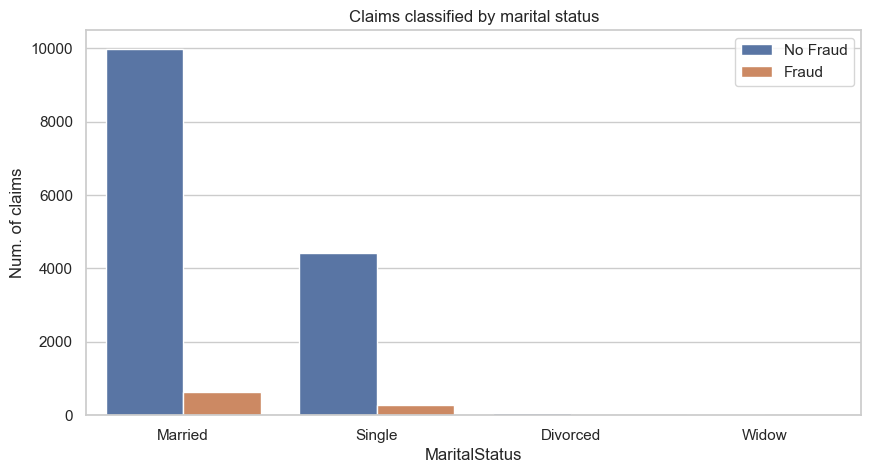

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'MaritalStatus', hue = 'FraudFound_P', data = df)
plt.title('Claims classified by marital status')
plt.legend(labels =['No Fraud','Fraud'])
plt.ylabel('Num. of claims')
plt.show()

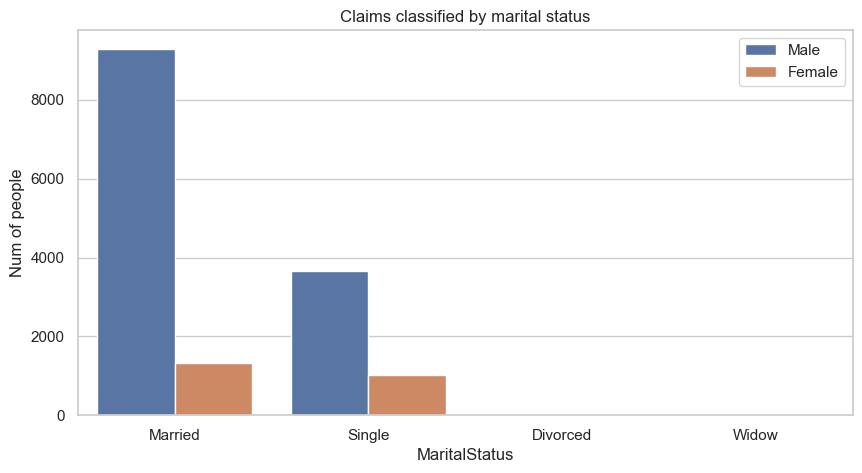

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'MaritalStatus', hue = 'Sex', data = df)
plt.title('Claims classified by marital status')
plt.legend(labels =['Male','Female'])
plt.ylabel('Num of people')
plt.show()

#### Married people are often involved in claims becuase insurance customers' age who frequently range between 31 and 65

## Checking all features for relationship with fraudulent and non-fraudulent claims

Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


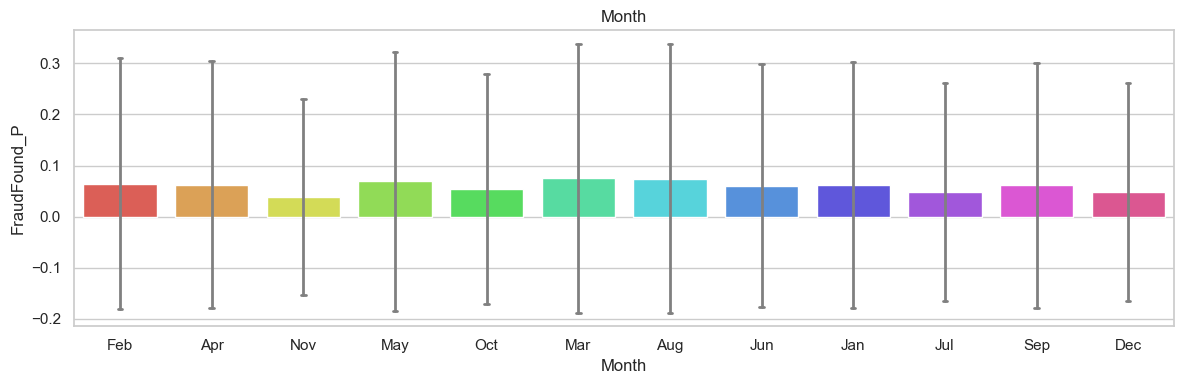

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


WeekOfMonth
1    0.062755
2    0.063238
3    0.059066
4    0.056504
5    0.055589
Name: FraudFound_P, dtype: float64
WeekOfMonth
1    0.242560
2    0.243424
3    0.235780
4    0.230926
5    0.229197
Name: FraudFound_P, dtype: float64


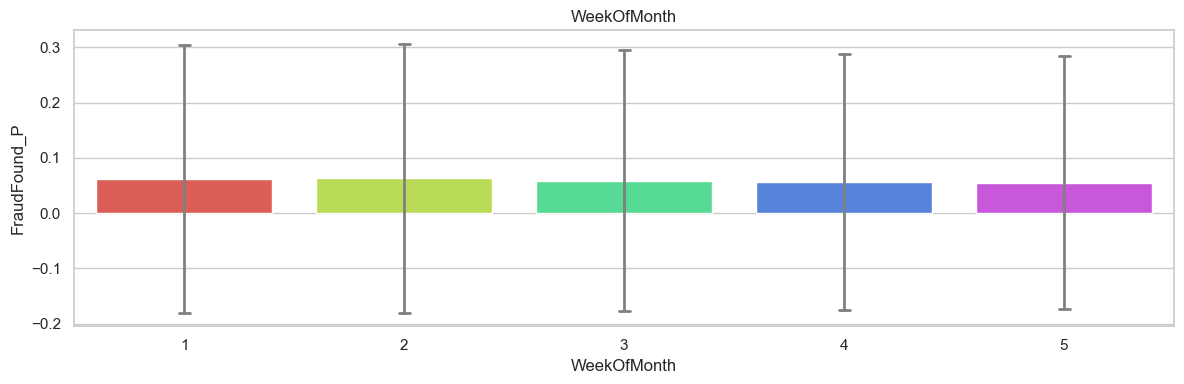

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DayOfWeek
Friday       0.062986
Monday       0.061162
Saturday     0.066599
Sunday       0.069914
Thursday     0.055223
Tuesday      0.052174
Wednesday    0.053265
Name: FraudFound_P, dtype: float64
DayOfWeek
Friday       0.242987
Monday       0.239673
Saturday     0.249390
Sunday       0.255075
Thursday     0.228468
Tuesday      0.222426
Wednesday    0.224614
Name: FraudFound_P, dtype: float64


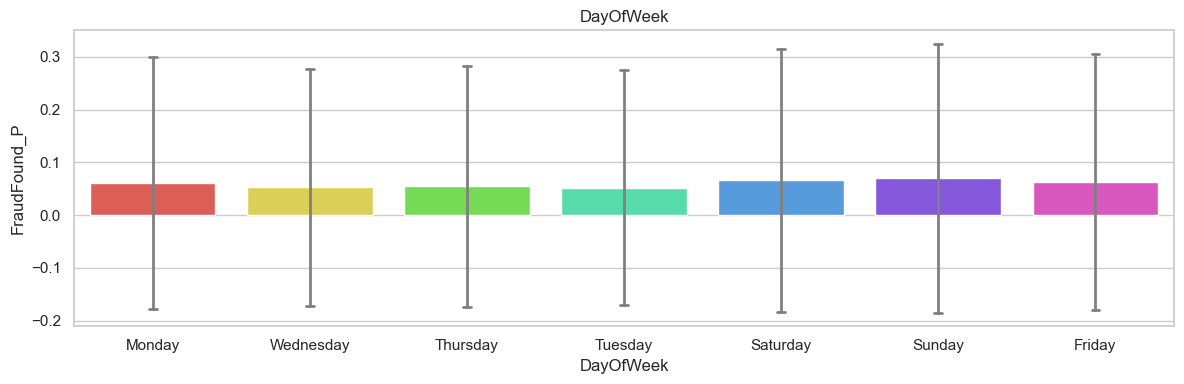

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Make
Accura       0.125000
BMW          0.066667
Chevrolet    0.055919
Dodge        0.018349
Ferrari      0.000000
Ford         0.073333
Honda        0.063906
Jaguar       0.000000
Lexus        0.000000
Mazda        0.052251
Mecedes      0.250000
Mercury      0.072289
Nisson       0.033333
Pontiac      0.055512
Porche       0.000000
Saab         0.101852
Saturn       0.103448
Toyota       0.059596
VW           0.028269
Name: FraudFound_P, dtype: float64
Make
Accura       0.331070
BMW          0.258199
Chevrolet    0.229834
Dodge        0.134829
Ferrari      0.000000
Ford         0.260973
Honda        0.244629
Jaguar       0.000000
Lexus             NaN
Mazda        0.222581
Mecedes      0.500000
Mercury      0.260540
Nisson       0.182574
Pontiac      0.229007
Porche       0.000000
Saab         0.303863
Saturn       0.307203
Toyota       0.236775
VW           0.166033
Name: FraudFound_P, dtype: float64


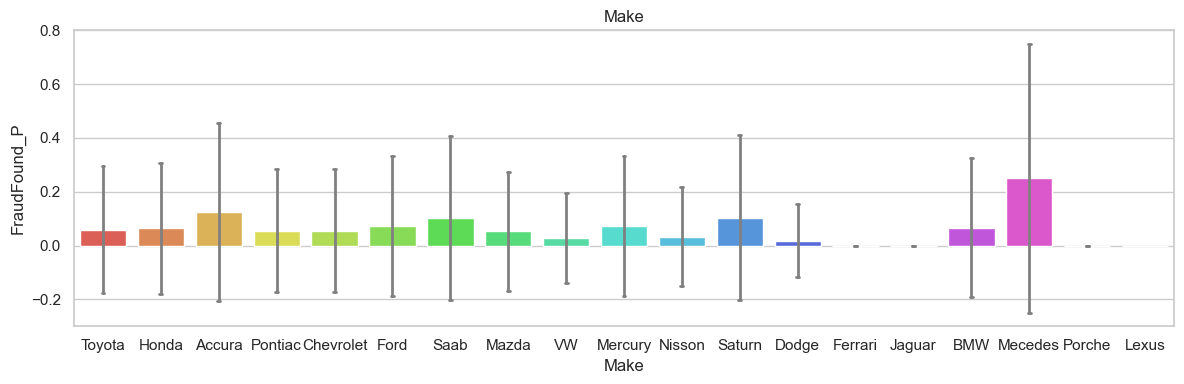

AccidentArea
Rural    0.083229
Urban    0.057155
Name: FraudFound_P, dtype: float64
AccidentArea
Rural    0.276315
Urban    0.232147
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


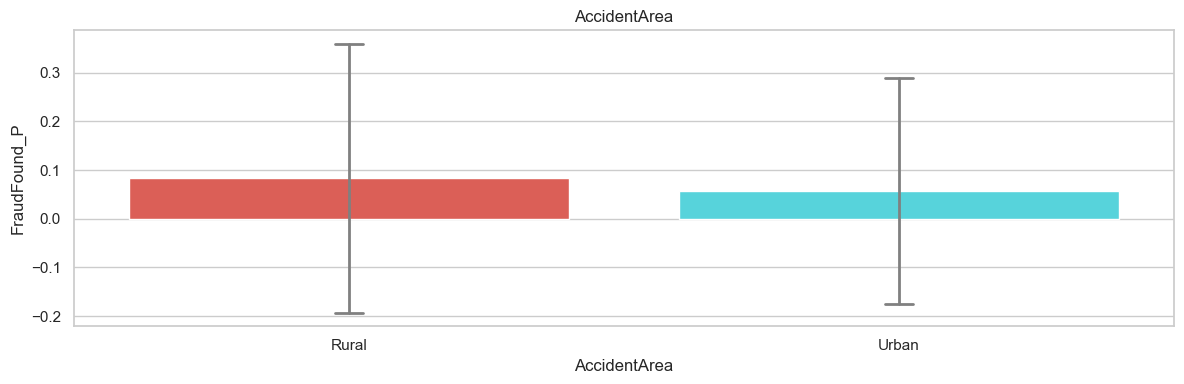

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DayOfWeekClaimed
0            0.000000
Friday       0.065679
Monday       0.057493
Saturday     0.078740
Sunday       0.057692
Thursday     0.054135
Tuesday      0.058667
Wednesday    0.063707
Name: FraudFound_P, dtype: float64
DayOfWeekClaimed
0                 NaN
Friday       0.247769
Monday       0.232813
Saturday     0.270399
Sunday       0.235435
Thursday     0.226327
Tuesday      0.235035
Wednesday    0.244272
Name: FraudFound_P, dtype: float64


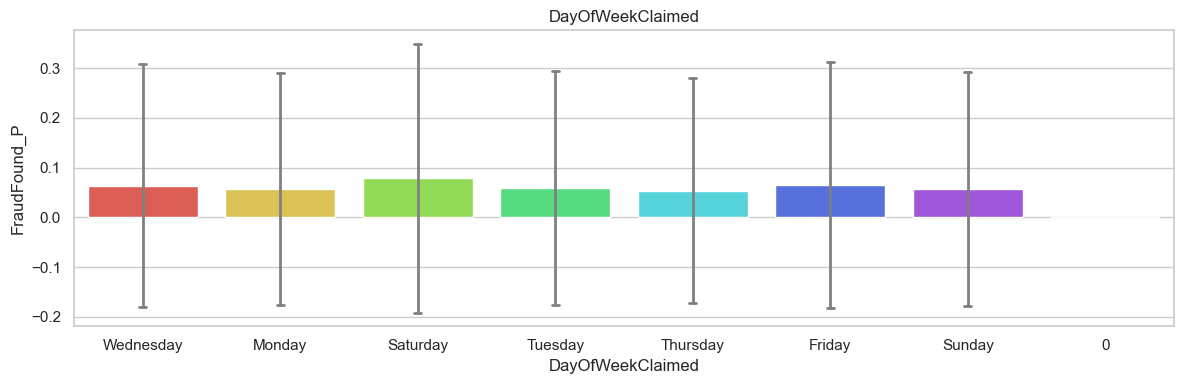

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


MonthClaimed
0      0.000000
Apr    0.064516
Aug    0.081705
Dec    0.042757
Feb    0.060606
Jan    0.063624
Jul    0.045714
Jun    0.060325
Mar    0.071958
May    0.072289
Nov    0.035798
Oct    0.054518
Sep    0.062802
Name: FraudFound_P, dtype: float64
MonthClaimed
0           NaN
Apr    0.245767
Aug    0.274037
Dec    0.202398
Feb    0.238699
Jan    0.244166
Jul    0.208950
Jun    0.238180
Mar    0.258515
May    0.259058
Nov    0.185858
Oct    0.227122
Sep    0.242704
Name: FraudFound_P, dtype: float64


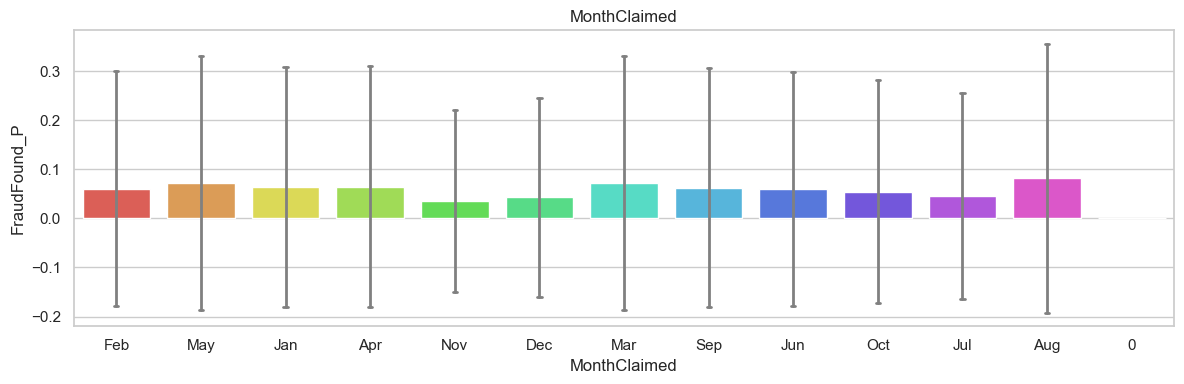

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])


WeekOfMonthClaimed
1    0.063768
2    0.055914
3    0.061680
4    0.060880
5    0.052674
Name: FraudFound_P, dtype: float64
WeekOfMonthClaimed
1    0.244375
2    0.229786
3    0.240607
4    0.239144
5    0.223473
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


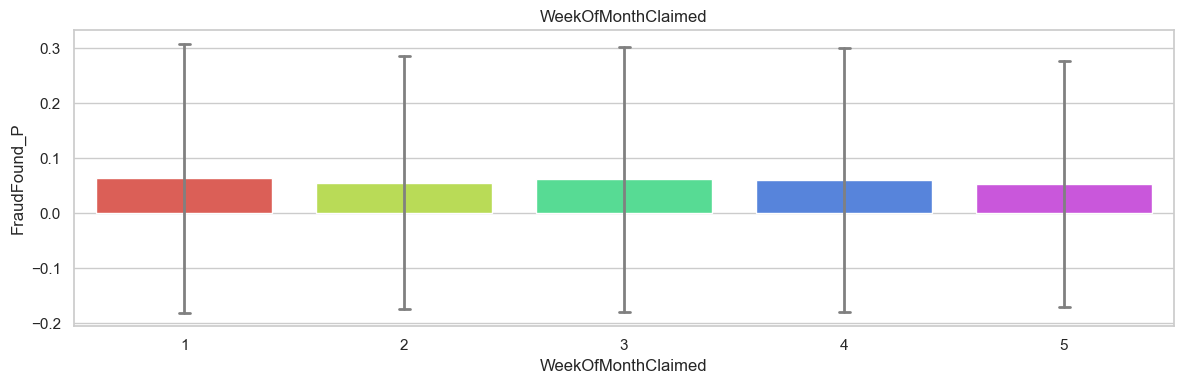

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Sex
Female    0.043388
Male      0.062923
Name: FraudFound_P, dtype: float64
Sex
Female    0.203772
Male      0.242834
Name: FraudFound_P, dtype: float64


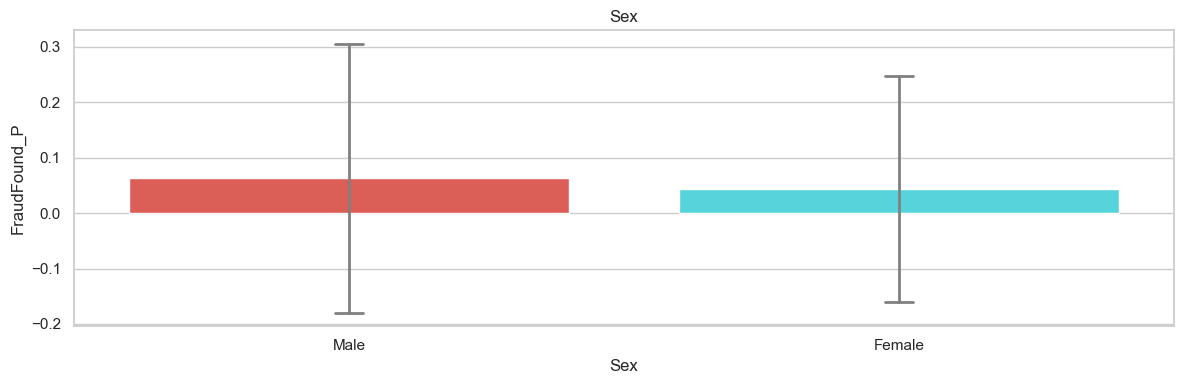

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


MaritalStatus
Divorced    0.039474
Married     0.060141
Single      0.059351
Widow       0.085714
Name: FraudFound_P, dtype: float64
MaritalStatus
Divorced    0.196013
Married     0.237759
Single      0.236306
Widow       0.284029
Name: FraudFound_P, dtype: float64


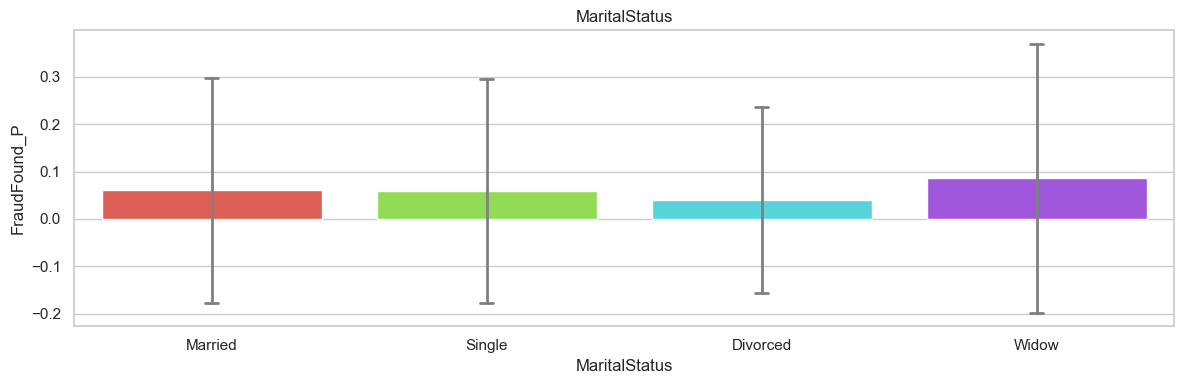

Fault
Policy Holder    0.078896
Third Party      0.008831
Name: FraudFound_P, dtype: float64
Fault
Policy Holder    0.269588
Third Party      0.093566
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


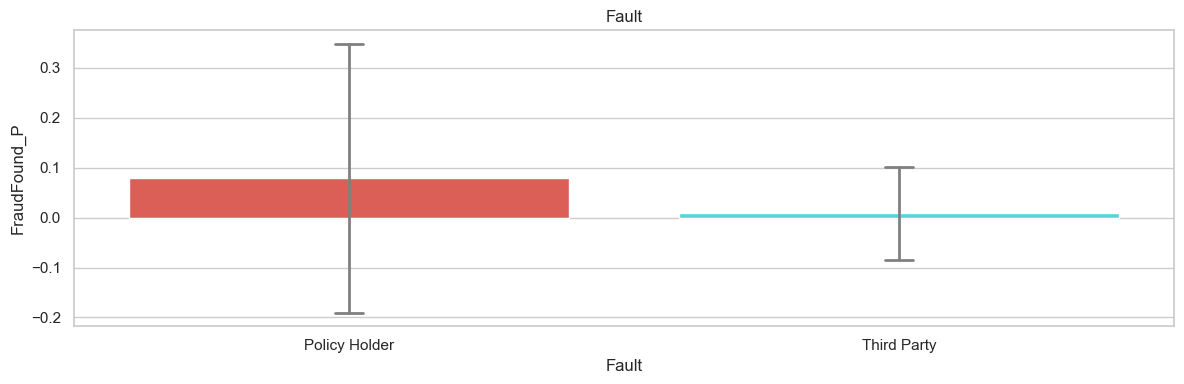

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,


PolicyType
Sedan - All Perils      0.100563
Sedan - Collision       0.068768
Sedan - Liability       0.007219
Sport - All Perils      0.000000
Sport - Collision       0.137931
Sport - Liability       0.000000
Utility - All Perils    0.120588
Utility - Collision     0.100000
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64
PolicyType
Sedan - All Perils      0.300786
Sedan - Collision       0.253082
Sedan - Liability       0.084665
Sport - All Perils      0.000000
Sport - Collision       0.345324
Sport - Liability            NaN
Utility - All Perils    0.326128
Utility - Collision     0.305129
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


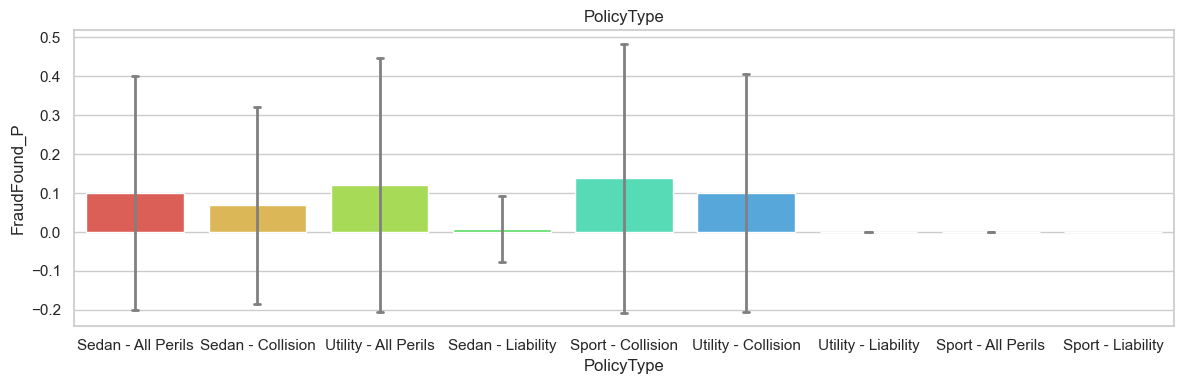

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


VehicleCategory
Sedan      0.082205
Sport      0.015677
Utility    0.112532
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.274690
Sport      0.124236
Utility    0.316425
Name: FraudFound_P, dtype: float64


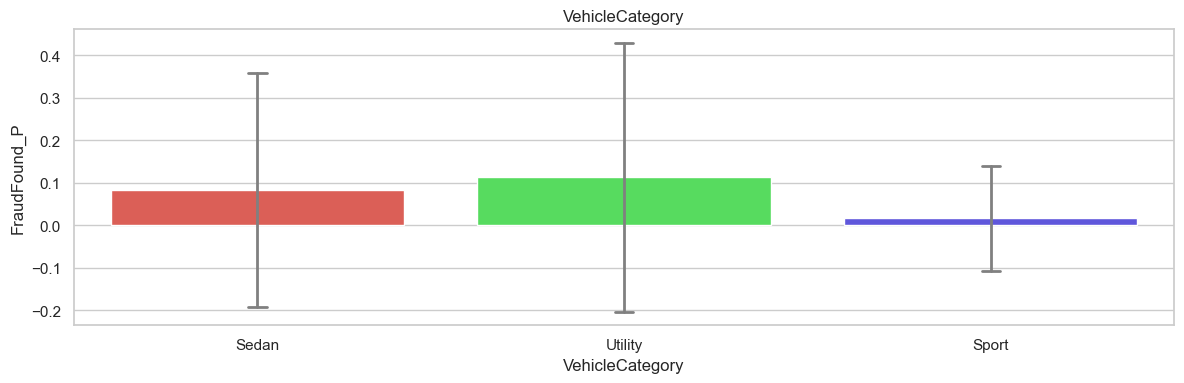

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


VehiclePrice
20000 to 29000     0.052110
30000 to 39000     0.049533
40000 to 59000     0.067245
60000 to 69000     0.045977
less than 20000    0.093978
more than 69000    0.087338
Name: FraudFound_P, dtype: float64
VehiclePrice
20000 to 29000     0.222263
30000 to 39000     0.217009
40000 to 59000     0.250718
60000 to 69000     0.210649
less than 20000    0.291931
more than 69000    0.282395
Name: FraudFound_P, dtype: float64


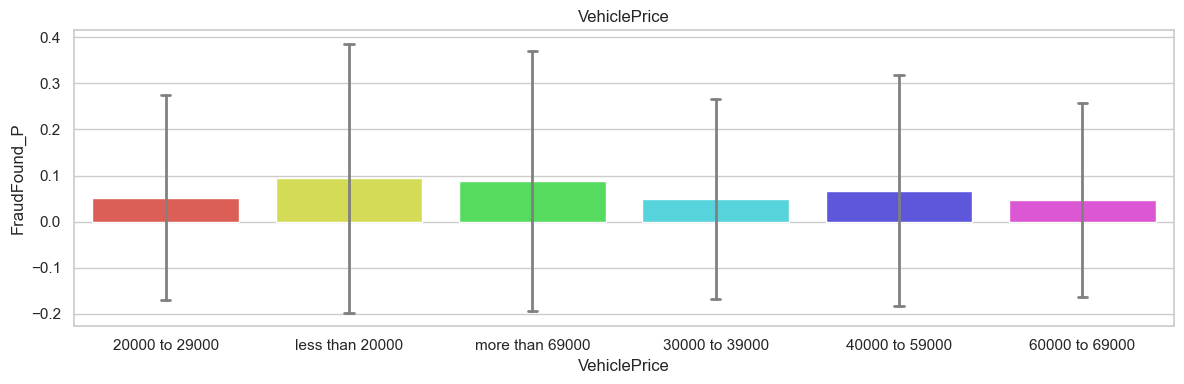

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Deductible
300    0.250000
400    0.057690
500    0.178707
700    0.057878
Name: FraudFound_P, dtype: float64
Deductible
300    0.462910
400    0.233164
500    0.383837
700    0.233889
Name: FraudFound_P, dtype: float64


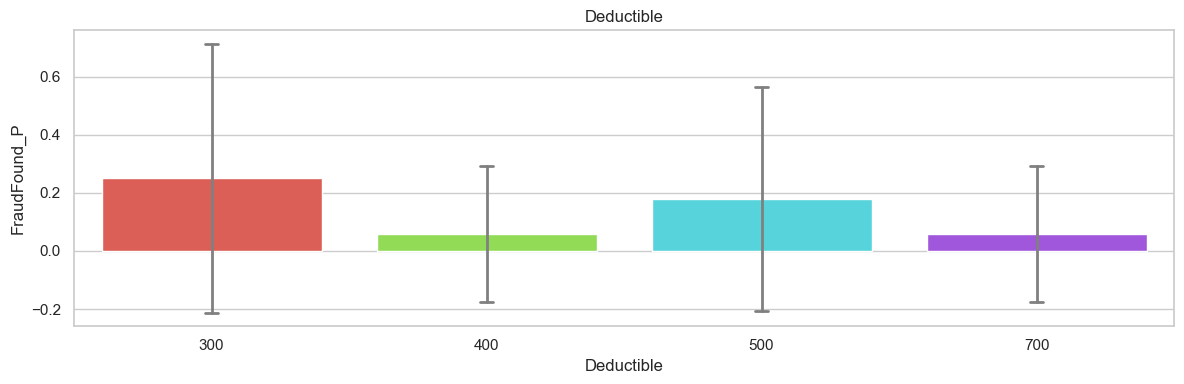

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DriverRating
1    0.058824
2    0.056301
3    0.062307
4    0.061989
Name: FraudFound_P, dtype: float64
DriverRating
1    0.235324
2    0.230532
3    0.241743
4    0.241167
Name: FraudFound_P, dtype: float64


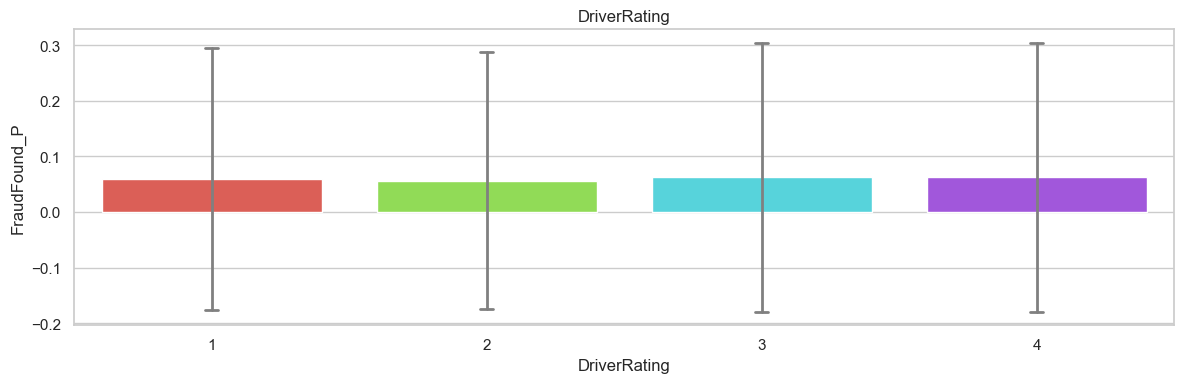

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Days_Policy_Accident
1 to 7          0.071429
15 to 30        0.061224
8 to 15         0.090909
more than 30    0.059356
none            0.163636
Name: FraudFound_P, dtype: float64
Days_Policy_Accident
1 to 7          0.267261
15 to 30        0.242226
8 to 15         0.290129
more than 30    0.236297
none            0.373355
Name: FraudFound_P, dtype: float64


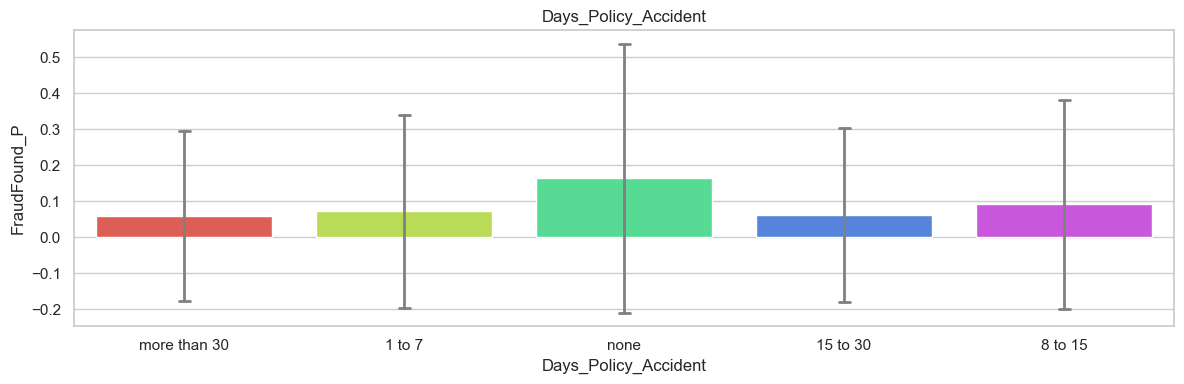

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Days_Policy_Claim
15 to 30        0.107143
8 to 15         0.142857
more than 30    0.059575
none            0.000000
Name: FraudFound_P, dtype: float64
Days_Policy_Claim
15 to 30        0.312094
8 to 15         0.358569
more than 30    0.236705
none                 NaN
Name: FraudFound_P, dtype: float64


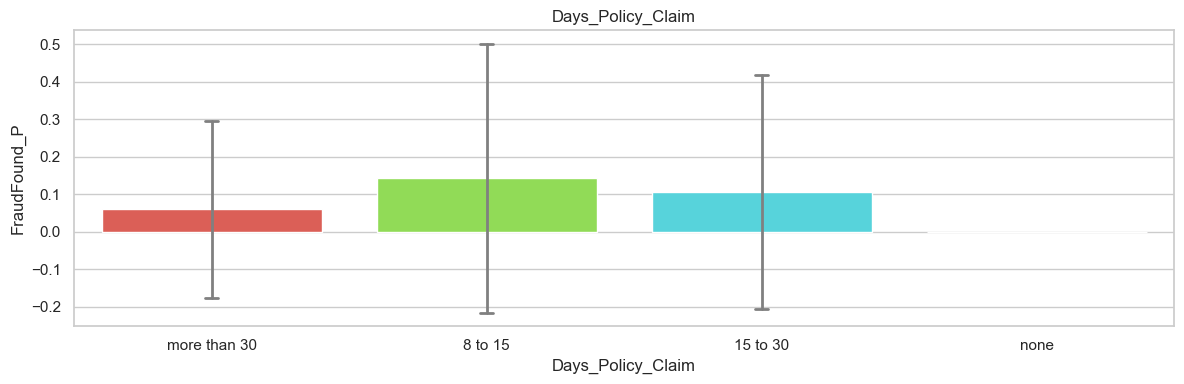

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


PastNumberOfClaims
1              0.062133
2 to 4         0.053601
more than 4    0.033831
none           0.077895
Name: FraudFound_P, dtype: float64
PastNumberOfClaims
1              0.241430
2 to 4         0.225249
more than 4    0.180839
none           0.268037
Name: FraudFound_P, dtype: float64


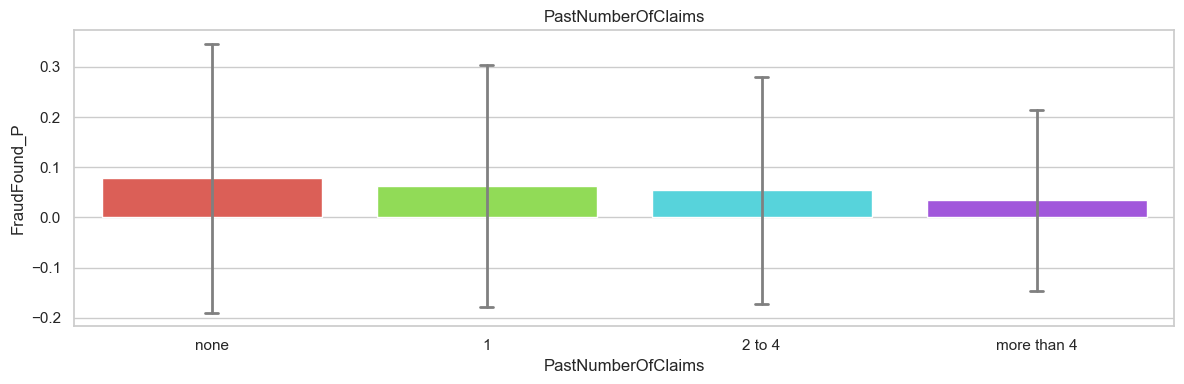

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AgeOfVehicle
2 years        0.041096
3 years        0.085526
4 years        0.091703
5 years        0.070007
6 years        0.066125
7 years        0.055967
more than 7    0.051746
new            0.085791
Name: FraudFound_P, dtype: float64
AgeOfVehicle
2 years        0.199886
3 years        0.280588
4 years        0.289239
5 years        0.255254
6 years        0.248537
7 years        0.229878
more than 7    0.221541
new            0.280431
Name: FraudFound_P, dtype: float64


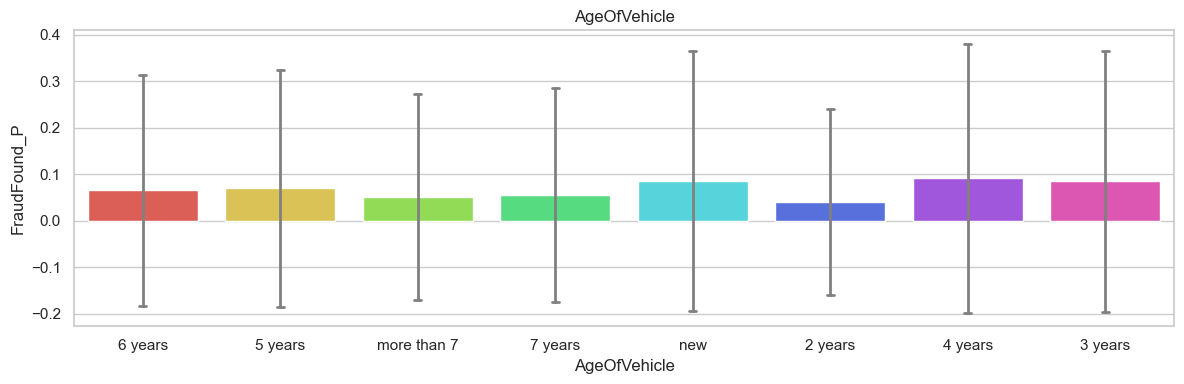

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])


AgeOfPolicyHolder
16 to 17    0.096875
18 to 20    0.133333
21 to 25    0.148148
26 to 30    0.053834
31 to 35    0.064366
36 to 40    0.058620
41 to 50    0.050919
51 to 65    0.050287
over 65     0.059055
Name: FraudFound_P, dtype: float64
AgeOfPolicyHolder
16 to 17    0.296251
18 to 20    0.351866
21 to 25    0.356903
26 to 30    0.225873
31 to 35    0.245426
36 to 40    0.234941
41 to 50    0.219872
51 to 65    0.218616
over 65     0.235960
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


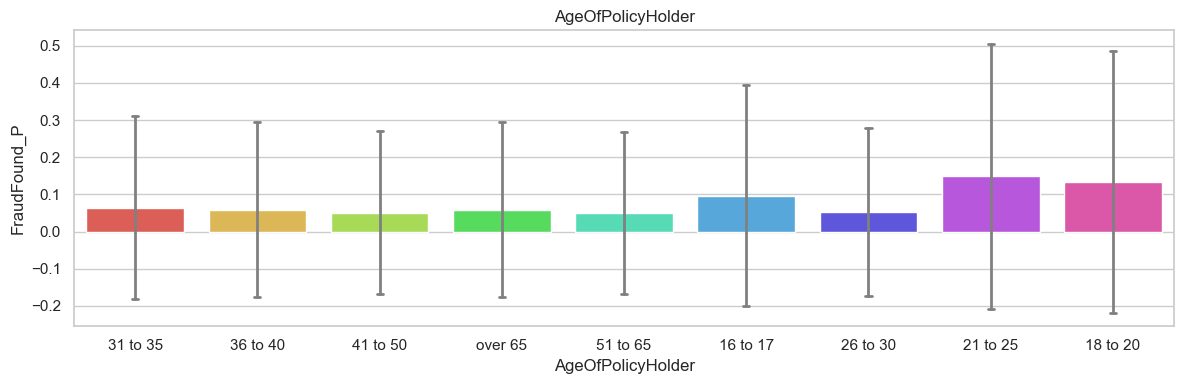

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


PoliceReportFiled
No     0.060499
Yes    0.037383
Name: FraudFound_P, dtype: float64
PoliceReportFiled
No     0.238417
Yes    0.189921
Name: FraudFound_P, dtype: float64


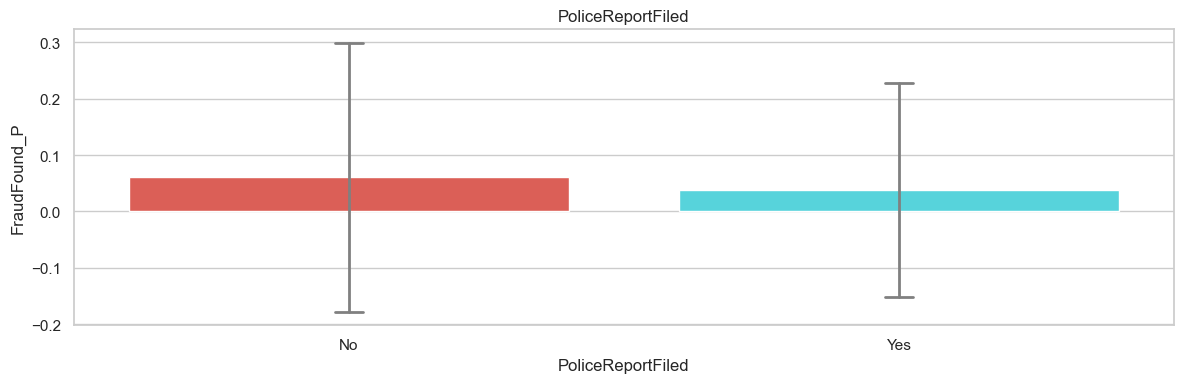

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


WitnessPresent
No     0.060001
Yes    0.034483
Name: FraudFound_P, dtype: float64
WitnessPresent
No     0.237497
Yes    0.183523
Name: FraudFound_P, dtype: float64


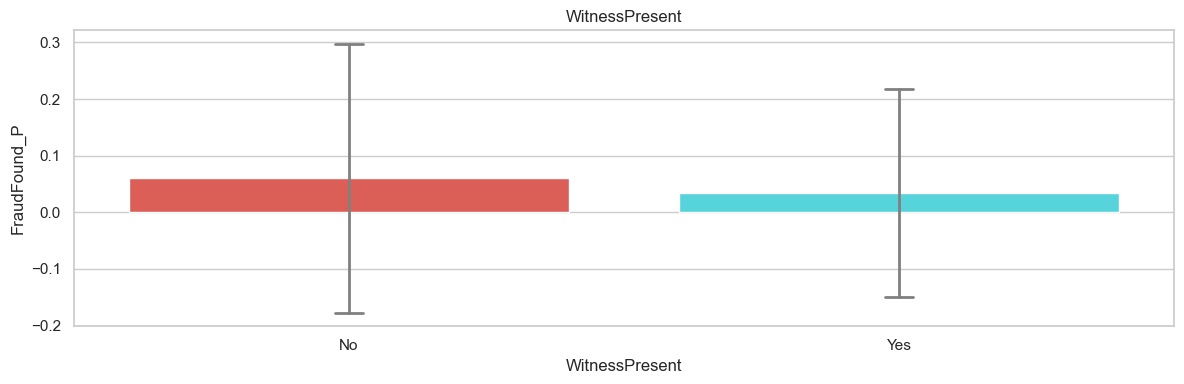

AgentType
External    0.060544
Internal    0.016598
Name: FraudFound_P, dtype: float64
AgentType
External    0.238500
Internal    0.128024
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


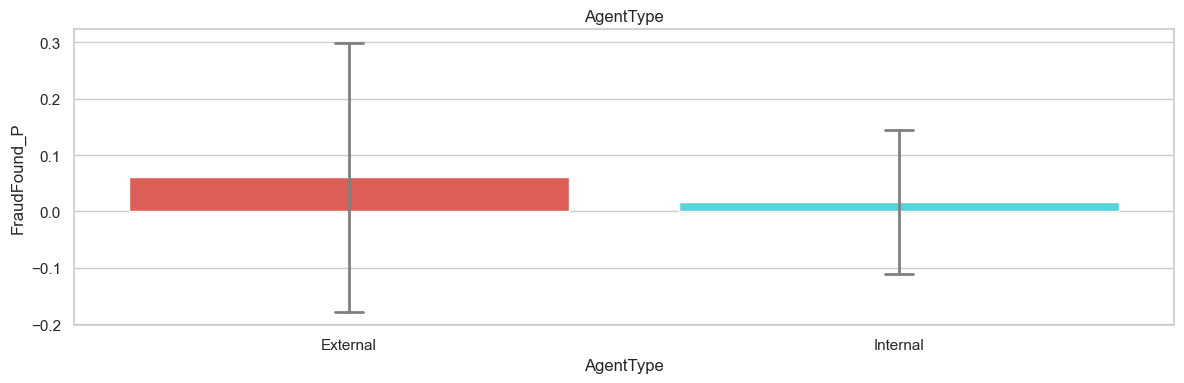

NumberOfSuppliments
1 to 2         0.063881
3 to 5         0.048091
more than 5    0.050427
none           0.066979
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


NumberOfSuppliments
1 to 2         0.244590
3 to 5         0.214012
more than 5    0.218852
none           0.250003
Name: FraudFound_P, dtype: float64


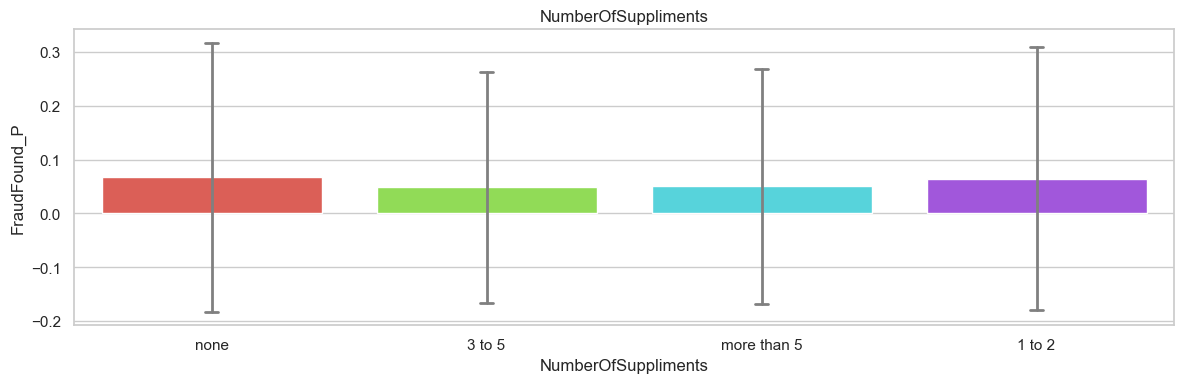

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AddressChange_Claim
1 year            0.064706
2 to 3 years      0.175258
4 to 8 years      0.052298
no change         0.057596
under 6 months    0.750000
Name: FraudFound_P, dtype: float64
AddressChange_Claim
1 year            0.246733
2 to 3 years      0.380842
4 to 8 years      0.222804
no change         0.232985
under 6 months    0.500000
Name: FraudFound_P, dtype: float64


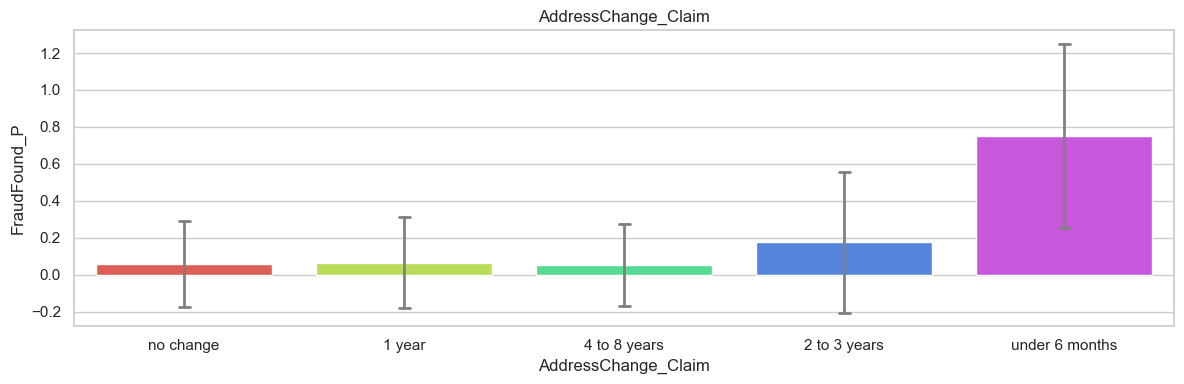

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


NumberOfCars
1 vehicle      0.059374
2 vehicles     0.060649
3 to 4         0.077957
5 to 8         0.047619
more than 8    0.000000
Name: FraudFound_P, dtype: float64
NumberOfCars
1 vehicle      0.236332
2 vehicles     0.238853
3 to 4         0.268465
5 to 8         0.218218
more than 8    0.000000
Name: FraudFound_P, dtype: float64


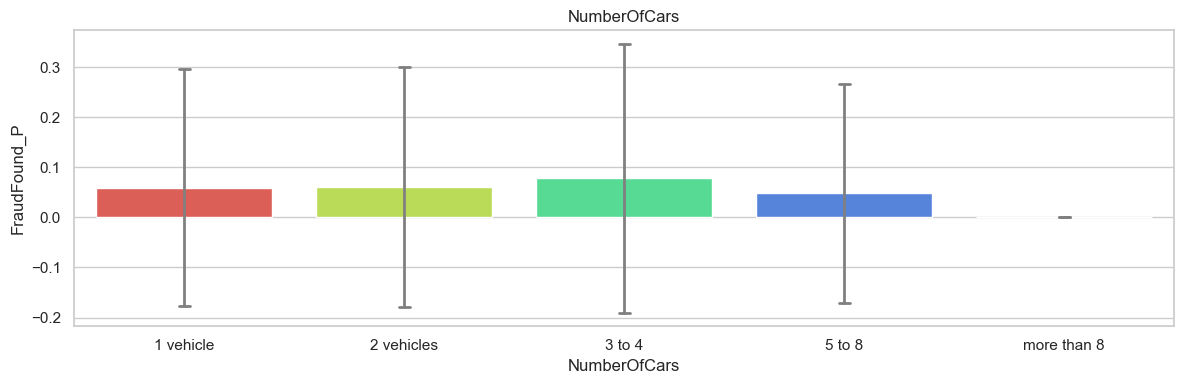

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Year
1994    0.066591
1995    0.057940
1996    0.052168
Name: FraudFound_P, dtype: float64
Year
1994    0.249332
1995    0.233653
1996    0.222392
Name: FraudFound_P, dtype: float64


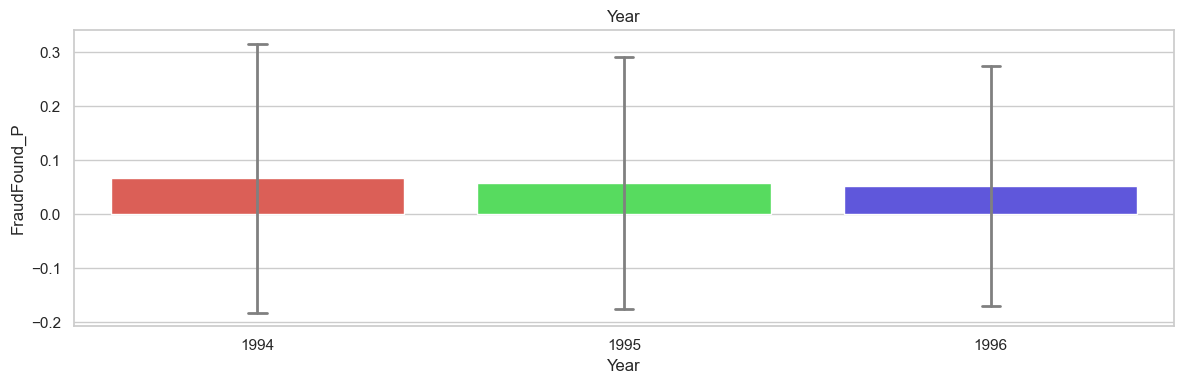

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])


BasePolicy
All Perils    0.101596
Collision     0.072962
Liability     0.007187
Name: FraudFound_P, dtype: float64
BasePolicy
All Perils    0.302150
Collision     0.260096
Liability     0.084480
Name: FraudFound_P, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_24912\1700921034.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


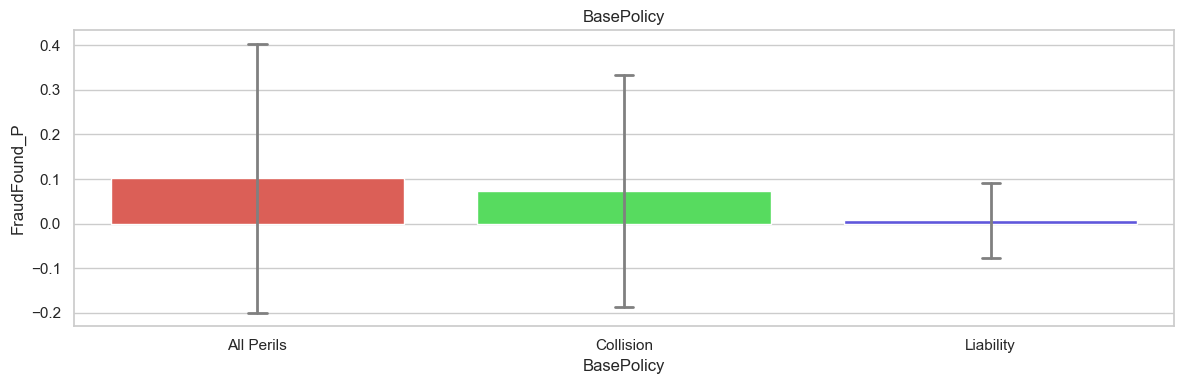

In [49]:
for i in ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']:
    sns.set(style="whitegrid") 
    plt.figure(figsize=(12,4))
    ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            ).set(title=i)

    print(df.groupby([i]).mean()['FraudFound_P'])
    print(df.groupby([i]).std()['FraudFound_P'])
    plt.tight_layout()
    plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24912\183341918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\asus\AppData\Local\Temp\ipykernel_24912\183341918.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


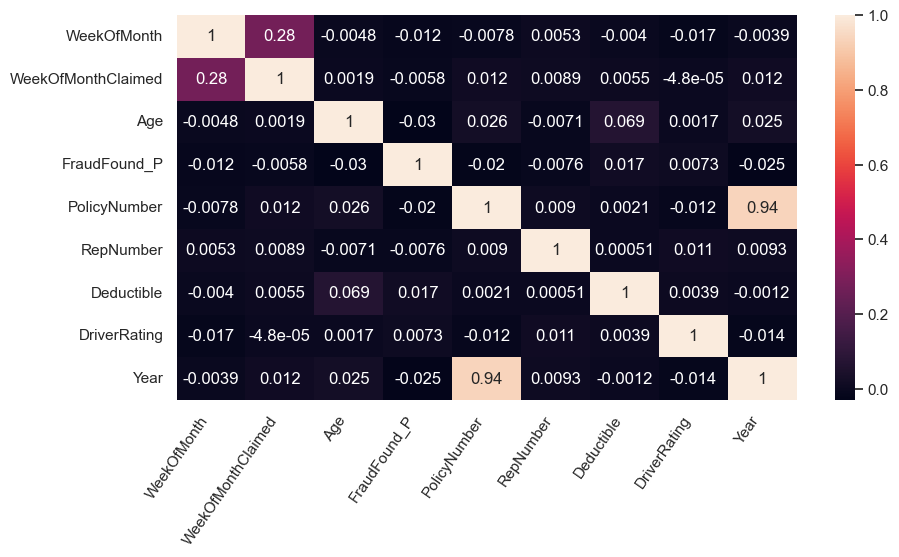

In [50]:
df.corr()
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation = 55, horizontalalignment='right')
plt.show()

<div class="alert alert-block alert-success">
<b>Data preparation:</b>
</div>

# Encoding

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder

In [52]:
df = df.drop(columns='PolicyType')

In [53]:
df = df[~(df['MonthClaimed']=='0')]

In [54]:
df[df['Age']==0]['AgeOfPolicyHolder'].unique() 
df['Age'] =df['Age'].replace({0:16.5})

In [55]:
col_ordering = [
    {'col':'AccidentArea','mapping':{'Urban':1, 'Rural':0}},
    {'col':'Sex','mapping':{'Female':1, 'Male':0}},
    {'col':'Fault','mapping':{'Policy Holder':1, 'Third Party':0}},
    {'col':'PoliceReportFiled','mapping':{'Yes':1, 'No':0}},
    {'col':'WitnessPresent','mapping':{'Yes':1, 'No':0}},
    {'col':'AgentType','mapping':{'External':1, 'Internal':0}},
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':3 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3}}, 
    {'col':'VehiclePrice','mapping':{'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                     '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days_Policy_Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days_Policy_Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                          '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange_Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [56]:
df2 = ord_encoder.fit_transform(df)

In [57]:
OHE = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 
df3 = OHE.fit_transform(df2)

In [58]:
df3 = df3.drop(columns='AreaType')
df3 = df3.drop(columns='Date')

In [59]:
df3.head()

,Month,WeekOfMonth,DayOfWeek,Make_Toyota,Make_Honda,Make_Accura,Make_Pontiac,Make_Chevrolet,Make_Ford,Make_Saab,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
6219,2,2,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1995,1,0,0
211,2,4,3,0,1,0,0,0,0,0,...,0,0,1,2,0,1,1994,1,0,0
4181,4,4,3,0,1,0,0,0,0,0,...,0,0,0,3,0,1,1994,0,1,0
2850,11,2,3,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1994,1,0,0
2908,5,3,3,0,0,0,1,0,0,0,...,0,0,1,3,0,1,1994,1,0,0


In [60]:
X = df3.drop(columns='FraudFound_P')
y = df3['FraudFound_P']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
x_train.shape, x_test.shape, X.shape

((10793, 56), (4626, 56), (15419, 56))

<div class="alert alert-block alert-info">
<b>Tackle the problem:</b>
</div>

### Using Models Like:
1. Logistic Regression
2. SVM
3. Random forest
4. Decision tree
5. KNN
6. Naive Bayes

### Logistic Regression:
Logistic regression is a popular model for binary classification problems. It estimates the probability of an event occurring based on the input features.

In [62]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict_proba(x_test)[:, 1]
logistic_auc = roc_auc_score(y_test, y_pred_logistic)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)

# Predict on the test data
y_pred = logistic_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9401210549070471


### Support Vector Machines (SVM):
SVM is a powerful algorithm for both binary and multiclass classification tasks. It aims to find the best hyperplane that separates the data points of different classes.

In [63]:
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict_proba(x_test)[:, 1]
svm_auc = roc_auc_score(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

# Predict on the test data
y_pred = svm_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9401210549070471


### Random Forest:
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is robust and less prone to overfitting.

In [64]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Predict on the test data
y_pred = rf_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.940337224383917


### Decision Trees:
Decision trees are simple yet effective models for classification. They make decisions by creating a flowchart-like structure based on the input features.

In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict_proba(x_test)[:, 1]
dt_auc = roc_auc_score(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

# Predict on the test data
y_pred = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.9111543450064851


### K-Nearest Neighbors (KNN):
KNN is a non-parametric algorithm that classifies a data point based on the majority class of its k nearest neighbors.

In [66]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict_proba(x_test)[:, 1]
knn_auc = roc_auc_score(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# Predict on the test data
y_pred = knn_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9368785127539991


### Naive Bayes:
Naive Bayes is a probabilistic classifier that applies Bayes' theorem with the "naive" assumption of independence between features.

In [67]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict_proba(x_test)[:, 1]
nb_auc = roc_auc_score(y_test, y_pred_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

# Predict on the test data
y_pred = nb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7963683527885862


## Plot ROC curves

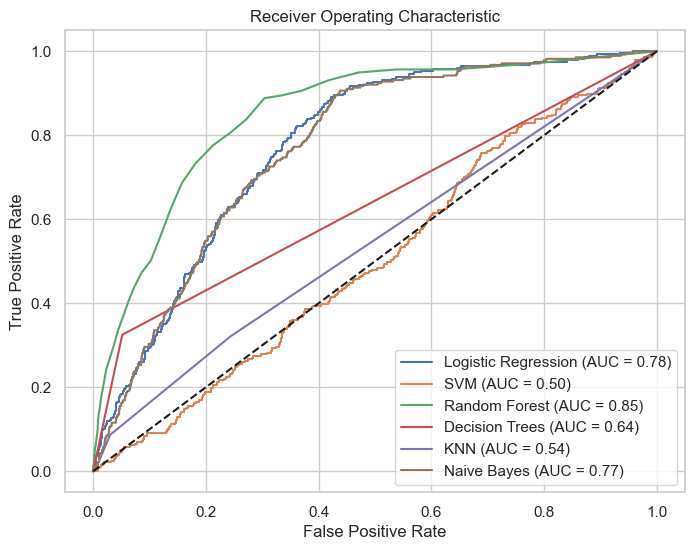

In [68]:

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %.2f)' % logistic_auc)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %.2f)' % svm_auc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.2f)' % rf_auc)
plt.plot(fpr_dt, tpr_dt, label='Decision Trees (AUC = %.2f)' % dt_auc)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %.2f)' % knn_auc)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Plot precision_recall curve

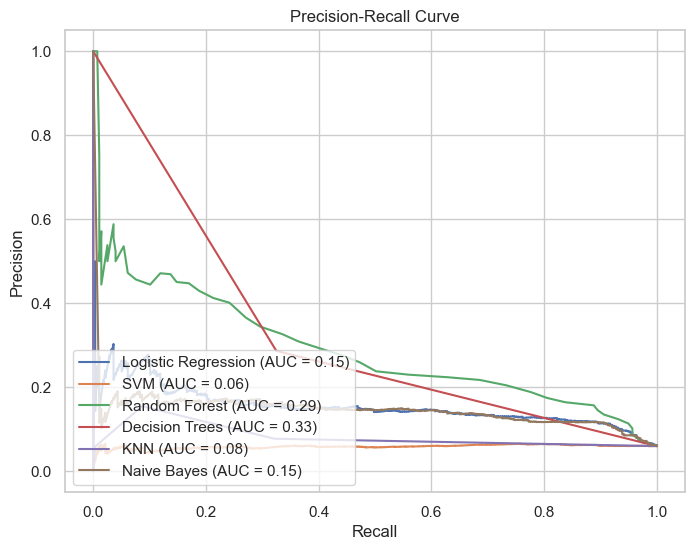

In [69]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall for Logistic Regression
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_pred_logistic)
pr_auc_logistic = auc(recall_logistic, precision_logistic)

# Calculate precision and recall for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

# Calculate precision and recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Calculate precision and recall for Decision Trees
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

# Calculate precision and recall for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Calculate precision and recall for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_nb)
pr_auc_nb = auc(recall_nb, precision_nb)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression (AUC = %.2f)' % pr_auc_logistic)
plt.plot(recall_svm, precision_svm, label='SVM (AUC = %.2f)' % pr_auc_svm)
plt.plot(recall_rf, precision_rf, label='Random Forest (AUC = %.2f)' % pr_auc_rf)
plt.plot(recall_dt, precision_dt, label='Decision Trees (AUC = %.2f)' % pr_auc_dt)
plt.plot(recall_knn, precision_knn, label='KNN (AUC = %.2f)' % pr_auc_knn)
plt.plot(recall_nb, precision_nb, label='Naive Bayes (AUC = %.2f)' % pr_auc_nb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


<div class="alert alert-block alert-warning">
<b>Use stratified cross-validation:</b> 
</div>

###  Import libraries

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from matplotlib.patches import Patch

In [71]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Define the models

In [72]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(probability=True)),
    ("Random Forest", RandomForestClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

### Plot both ROC curves for each model in one plot with labels

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

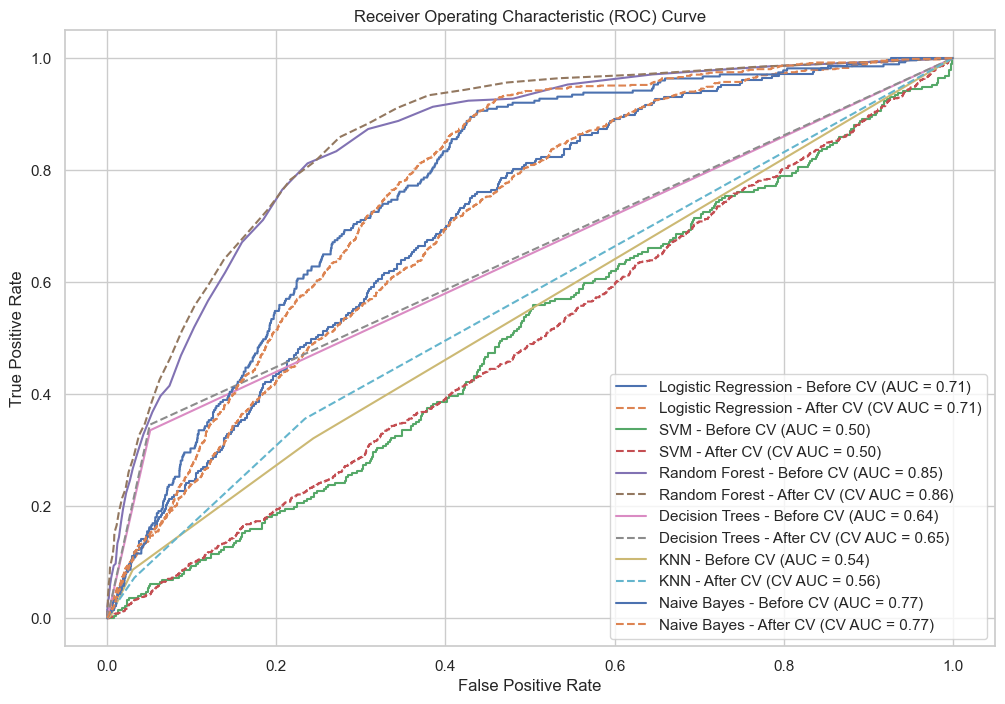

In [73]:
plt.figure(figsize=(12, 8))

for name, model in models:
    # Plot ROC curve before cross-validation
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} - Before CV (AUC = {roc_auc:.2f})")

    # Perform stratified cross-validation and plot ROC curve
    y_pred_proba_cv = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    roc_auc_cv = roc_auc_score(y, y_pred_proba_cv)
    fpr_cv, tpr_cv, _ = roc_curve(y, y_pred_proba_cv)
    plt.plot(fpr_cv, tpr_cv, linestyle='--', label=f"{name} - After CV (CV AUC = {roc_auc_cv:.2f})")

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()
plt.show()



<div class="alert alert-block alert-danger">
<b>Balancing dataset:</b> 
</div>

## Oversampling and Undersampling

At first, we give the data to the model before split

In [74]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

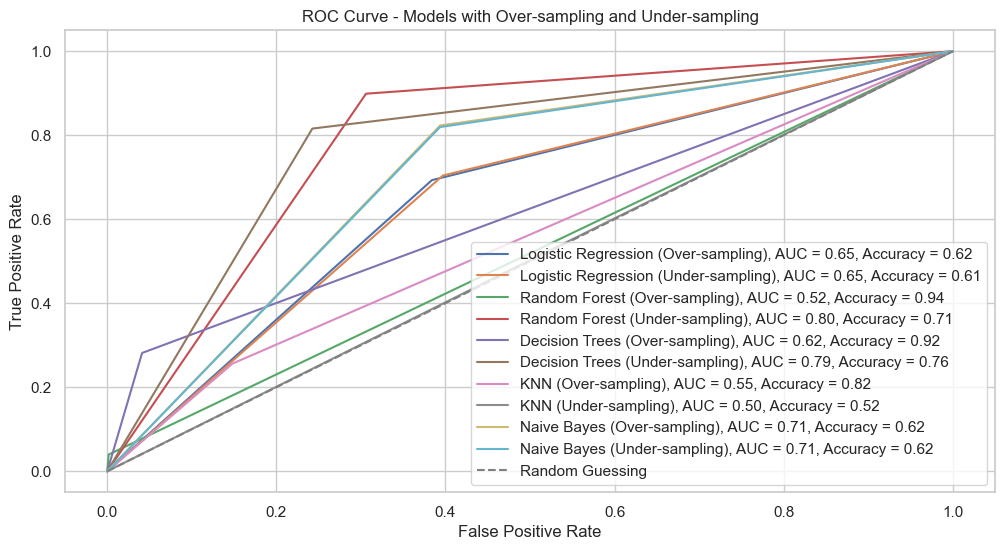

In [75]:
# Define the resampling methods
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Loop over the models and evaluate on resampled data
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

plt.figure(figsize=(12, 6))

for name, model in models:
    # Apply over-sampling
    over_sampler = RandomOverSampler(random_state=42)
    X_resampled_over, y_resampled_over = over_sampler.fit_resample(x_train, y_train)
    
    # Train the model on the over-sampled data
    model.fit(X_resampled_over, y_resampled_over)
    
    # Make predictions on the original test data (over-sampled)
    y_pred_over = model.predict(x_test)
    
    # Calculate accuracy score (over-sampled)
    accuracy_over = accuracy_score(y_test, y_pred_over)
    
    # Compute the ROC curve (over-sampled)
    fpr_over, tpr_over, _ = roc_curve(y_test, y_pred_over)
    
    # Apply under-sampling
    under_sampler = RandomUnderSampler(random_state=42)
    X_resampled_under, y_resampled_under = under_sampler.fit_resample(x_train, y_train)
    
    # Train the model on the under-sampled data
    model.fit(X_resampled_under, y_resampled_under)
    
    # Make predictions on the original test data (under-sampled)
    y_pred_under = model.predict(x_test)
    
    # Calculate accuracy score (under-sampled)
    accuracy_under = accuracy_score(y_test, y_pred_under)
    
    # Compute the ROC curve (under-sampled)
    fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_under)
    
    # Plot the ROC curve (over-sampled)
    plt.plot(fpr_over, tpr_over, label=f"{name} (Over-sampling), AUC = {roc_auc_score(y_test, y_pred_over):.2f}, Accuracy = {accuracy_over:.2f}")
    
    # Plot the ROC curve (under-sampled)
    plt.plot(fpr_under, tpr_under, label=f"{name} (Under-sampling), AUC = {roc_auc_score(y_test, y_pred_under):.2f}, Accuracy = {accuracy_under:.2f}")

# Plot the ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Models with Over-sampling and Under-sampling')
plt.legend()
plt.show()

Then we split the data first and finally give it to the model

In [76]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

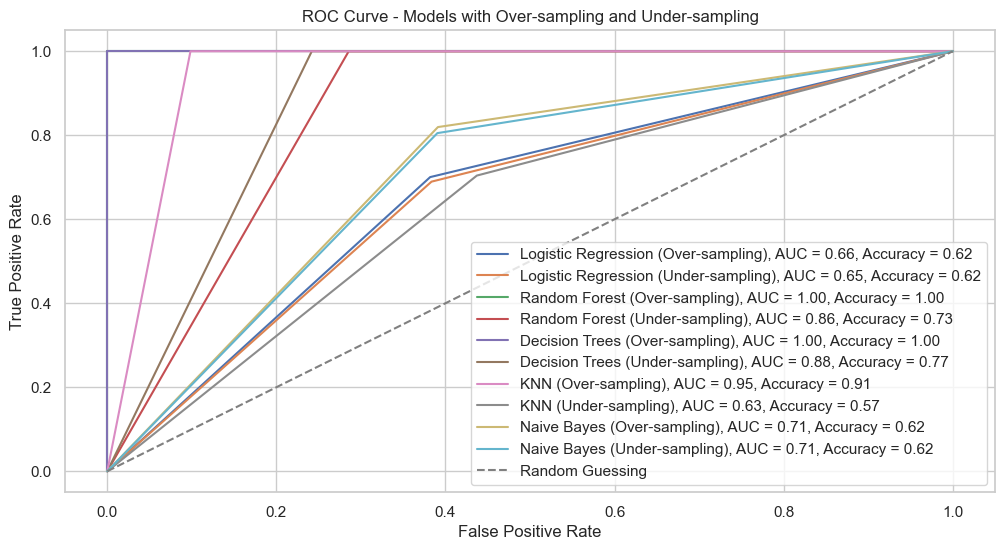

In [77]:
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Loop over the models and evaluate on resampled data
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

plt.figure(figsize=(12, 6))

for name, model in models:
    # Apply over-sampling
    over_sampler = RandomOverSampler(random_state=42)
    X_resampled_over, y_resampled_over = over_sampler.fit_resample(X, y)
    
    # Train the model on the over-sampled data
    model.fit(X_resampled_over, y_resampled_over)
    
    # Make predictions on the original test data (over-sampled)
    y_pred_over = model.predict(x_test)
    
    # Calculate accuracy score (over-sampled)
    accuracy_over = accuracy_score(y_test, y_pred_over)
    
    # Compute the ROC curve (over-sampled)
    fpr_over, tpr_over, _ = roc_curve(y_test, y_pred_over)
    
    # Apply under-sampling
    under_sampler = RandomUnderSampler(random_state=42)
    X_resampled_under, y_resampled_under = under_sampler.fit_resample(X, y)
    
    # Train the model on the under-sampled data
    model.fit(X_resampled_under, y_resampled_under)
    
    # Make predictions on the original test data (under-sampled)
    y_pred_under = model.predict(x_test)
    
    # Calculate accuracy score (under-sampled)
    accuracy_under = accuracy_score(y_test, y_pred_under)
    
    # Compute the ROC curve (under-sampled)
    fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_under)
    
    # Plot the ROC curve (over-sampled)
    plt.plot(fpr_over, tpr_over, label=f"{name} (Over-sampling), AUC = {roc_auc_score(y_test, y_pred_over):.2f}, Accuracy = {accuracy_over:.2f}")
    
    # Plot the ROC curve (under-sampled)
    plt.plot(fpr_under, tpr_under, label=f"{name} (Under-sampling), AUC = {roc_auc_score(y_test, y_pred_under):.2f}, Accuracy = {accuracy_under:.2f}")

# Plot the ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Models with Over-sampling and Under-sampling')
plt.legend()

# Show the plot
plt.show()

<div class="alert alert-block alert-success">
<b>Boosting the models:</b>
</div>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Preprocessing data with some scaler methods

In [79]:
# Preprocessing using MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(x_train)
X_test_minmax = scaler.transform(x_test)

# Preprocessing using RobustScaler
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(x_train)
X_test_robust = scaler.transform(x_test)

# SVM model with MinMaxScaler
svm_minmax = SVC(probability=True)
svm_minmax.fit(X_train_minmax, y_train)
y_pred_svm_minmax = svm_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_svm_minmax = roc_auc_score(y_test, y_pred_svm_minmax)
fpr_svm_minmax, tpr_svm_minmax, _ = roc_curve(y_test, y_pred_svm_minmax)

# SVM model with RobustScaler
svm_robust = SVC(probability=True)
svm_robust.fit(X_train_robust, y_train)
y_pred_svm_robust = svm_robust.predict_proba(X_test_robust)[:, 1]
roc_score_svm_robust = roc_auc_score(y_test, y_pred_svm_robust)
fpr_svm_robust, tpr_svm_robust, _ = roc_curve(y_test, y_pred_svm_robust)

# Random Forest model with MinMaxScaler
random_forest_minmax = RandomForestClassifier()
random_forest_minmax.fit(X_train_minmax, y_train)
y_pred_rf_minmax = random_forest_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_rf_minmax = roc_auc_score(y_test, y_pred_rf_minmax)
fpr_rf_minmax, tpr_rf_minmax, _ = roc_curve(y_test, y_pred_rf_minmax)

# Random Forest model with RobustScaler
random_forest_robust = RandomForestClassifier()
random_forest_robust.fit(X_train_robust, y_train)
y_pred_rf_robust = random_forest_robust.predict_proba(X_test_robust)[:, 1]
roc_score_rf_robust = roc_auc_score(y_test, y_pred_rf_robust)
fpr_rf_robust, tpr_rf_robust, _ = roc_curve(y_test, y_pred_rf_robust)



### Plot ROC curves


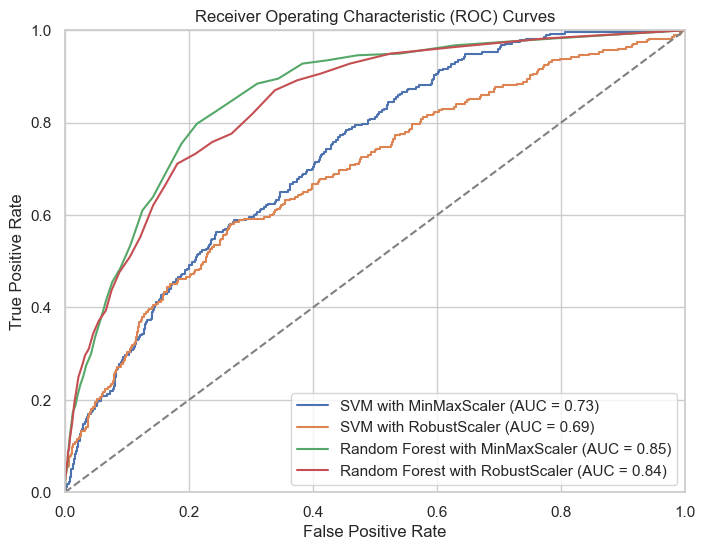

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_minmax, tpr_svm_minmax, label='SVM with MinMaxScaler (AUC = {:.2f})'.format(roc_score_svm_minmax))
plt.plot(fpr_svm_robust, tpr_svm_robust, label='SVM with RobustScaler (AUC = {:.2f})'.format(roc_score_svm_robust))
plt.plot(fpr_rf_minmax, tpr_rf_minmax, label='Random Forest with MinMaxScaler (AUC = {:.2f})'.format(roc_score_rf_minmax))
plt.plot(fpr_rf_robust, tpr_rf_robust, label='Random Forest with RobustScaler (AUC = {:.2f})'.format(roc_score_rf_robust))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Feature engineering 

In [81]:
# Example: Create a new feature by taking the square root of an existing feature
x_train_sqrt = np.sqrt(x_train)
x_test_sqrt = np.sqrt(x_test)

In [82]:
# Preprocessing using MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(x_train_sqrt)
X_test_minmax = scaler.transform(x_test_sqrt)

# Preprocessing using RobustScaler
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(x_train_sqrt)
X_test_robust = scaler.transform(x_test_sqrt)

# SVM model with MinMaxScaler
svm_minmax = SVC(probability=True, verbose=1)
svm_minmax.fit(X_train_minmax, y_train)
y_pred_svm_minmax = svm_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_svm_minmax = roc_auc_score(y_test, y_pred_svm_minmax)
fpr_svm_minmax, tpr_svm_minmax, _ = roc_curve(y_test, y_pred_svm_minmax)

# SVM model with RobustScaler
svm_robust = SVC(probability=True, verbose=1)
svm_robust.fit(X_train_robust, y_train)
y_pred_svm_robust = svm_robust.predict_proba(X_test_robust)[:, 1]
roc_score_svm_robust = roc_auc_score(y_test, y_pred_svm_robust)
fpr_svm_robust, tpr_svm_robust, _ = roc_curve(y_test, y_pred_svm_robust)

# Random Forest model with MinMaxScaler
random_forest_minmax = RandomForestClassifier(verbose=1)
random_forest_minmax.fit(X_train_minmax, y_train)
y_pred_rf_minmax = random_forest_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_rf_minmax = roc_auc_score(y_test, y_pred_rf_minmax)
fpr_rf_minmax, tpr_rf_minmax, _ = roc_curve(y_test, y_pred_rf_minmax)

# Random Forest model with RobustScaler
random_forest_robust = RandomForestClassifier(verbose=1)
random_forest_robust.fit(X_train_robust, y_train)
y_pred_rf_robust = random_forest_robust.predict_proba(X_test_robust)[:, 1]
roc_score_rf_robust = roc_auc_score(y_test, y_pred_rf_robust)
fpr_rf_robust, tpr_rf_robust, _ = roc_curve(y_test, y_pred_rf_robust)



[LibSVM][LibSVM]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Plot ROC curves


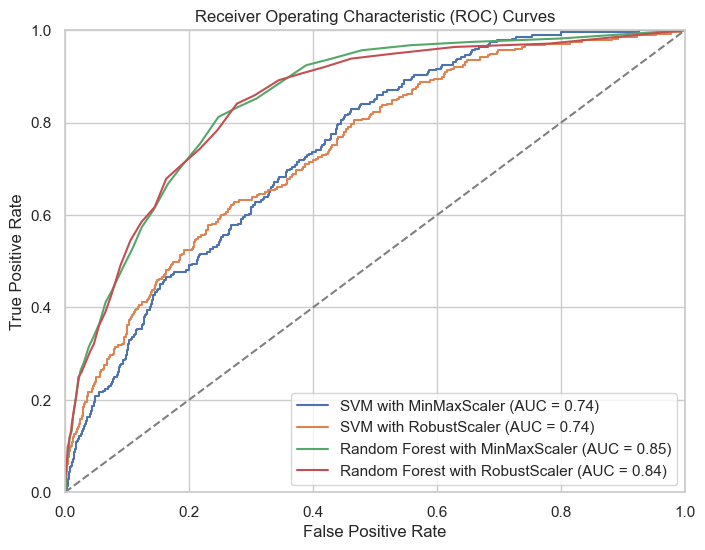

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_minmax, tpr_svm_minmax, label='SVM with MinMaxScaler (AUC = {:.2f})'.format(roc_score_svm_minmax))
plt.plot(fpr_svm_robust, tpr_svm_robust, label='SVM with RobustScaler (AUC = {:.2f})'.format(roc_score_svm_robust))
plt.plot(fpr_rf_minmax, tpr_rf_minmax, label='Random Forest with MinMaxScaler (AUC = {:.2f})'.format(roc_score_rf_minmax))
plt.plot(fpr_rf_robust, tpr_rf_robust, label='Random Forest with RobustScaler (AUC = {:.2f})'.format(roc_score_rf_robust))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Using GridSearchCV for finding best hyperparameters for models

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# SVM hyperparameters
svm_param_grid = {
    'C': [1],
    'kernel': ['rbf'],
    'gamma': ['auto']
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 5],
    'min_samples_split': [5]
}

# SVM model with hyperparameter tuning
svm_model = SVC(probability=True)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, scoring='roc_auc', cv=5, verbose=1)
svm_grid_search.fit(x_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Random Forest model with hyperparameter tuning
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='roc_auc', cv=5, verbose=1)
rf_grid_search.fit(x_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [86]:
# Predict probabilities for SVM
y_pred_svm = best_svm_model.predict_proba(x_test)[:, 1]
roc_score_svm = roc_auc_score(y_test, y_pred_svm)

# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

# Predict probabilities for Random Forest
y_pred_rf = best_rf_model.predict_proba(x_test)[:, 1]
roc_score_rf = roc_auc_score(y_test, y_pred_rf)

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Predict classes for SVM
y_pred_svm_binary = best_svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm_binary)

# Predict classes for Random Forest
y_pred_rf_binary = best_rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf_binary)


### Plot ROC curves

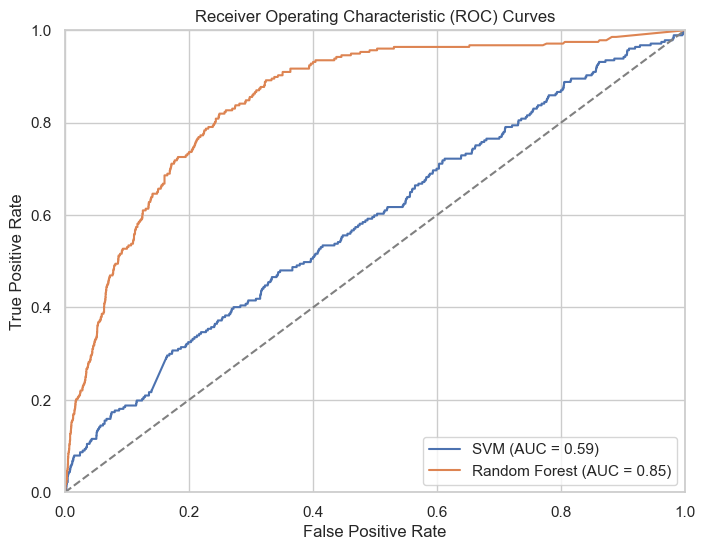

Accuracy - SVM: 0.94
Accuracy - Random Forest: 0.94


In [87]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_score_svm))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_score_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print accuracy
print("Accuracy - SVM: {:.2f}".format(accuracy_svm))
print("Accuracy - Random Forest: {:.2f}".format(accuracy_rf))

## Feature selection 

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [89]:
# Feature selection with SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(x_train, y_train)
X_test_selected = selector.transform(x_test)

# SVM model with selected features
svm_model = SVC(probability=True)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict_proba(X_test_selected)[:, 1]
roc_score_svm = roc_auc_score(y_test, y_pred_svm)

# Random Forest model with selected features
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict_proba(X_test_selected)[:, 1]
roc_score_rf = roc_auc_score(y_test, y_pred_rf)

# Print selected features
selected_features = selector.get_support(indices=True)
print("Selected Features:", selected_features)



C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features: [ 5 32 33 34 35 43 44 53 54 55]


### Plot ROC curves


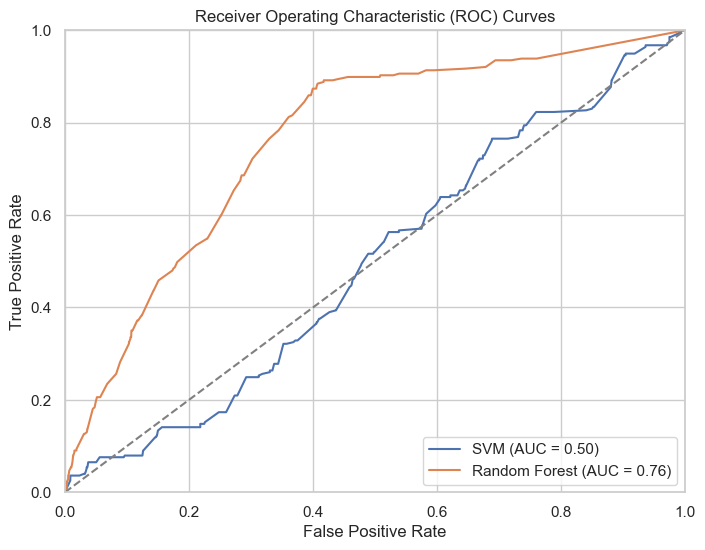

In [90]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_score_svm))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_score_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Mixed all Feature selection, best_fit model and Scaler methods

In [91]:
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [92]:
# Feature engineering with RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Feature selection with SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# SVM model with best-fit hyperparameters
svm_model = SVC(C=10, kernel='rbf', gamma=0.1, probability=True)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict_proba(X_test_selected)[:, 1]
roc_score_svm = roc_auc_score(y_test, y_pred_svm)

# Random Forest model with best-fit hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict_proba(X_test_selected)[:, 1]
roc_score_rf = roc_auc_score(y_test, y_pred_rf)

# Print selected features
selected_features = selector.get_support(indices=True)
print("Selected Features:", selected_features)




C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected Features: [ 5 32 33 34 35 43 44 53 54 55]


### Plot ROC curves


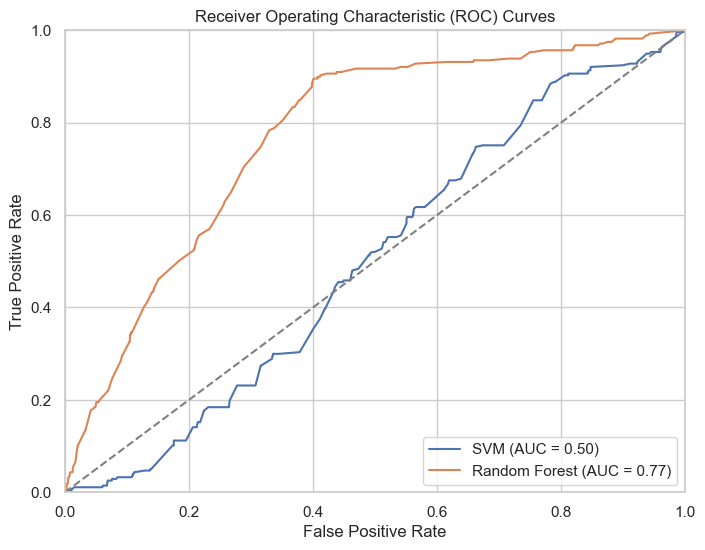

In [93]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_score_svm))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_score_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>XGBoost Model Testing:</b>
</div>

In [94]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [95]:
# XGBoost model
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

# Fit the model
gb_model.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict_proba(x_test)[:, 1]

# Calculate ROC AUC score
roc_score_gb = roc_auc_score(y_test, y_pred_gb)

# Calculate accuracy
y_pred_gb_binary = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb_binary)




### Plot ROC curve


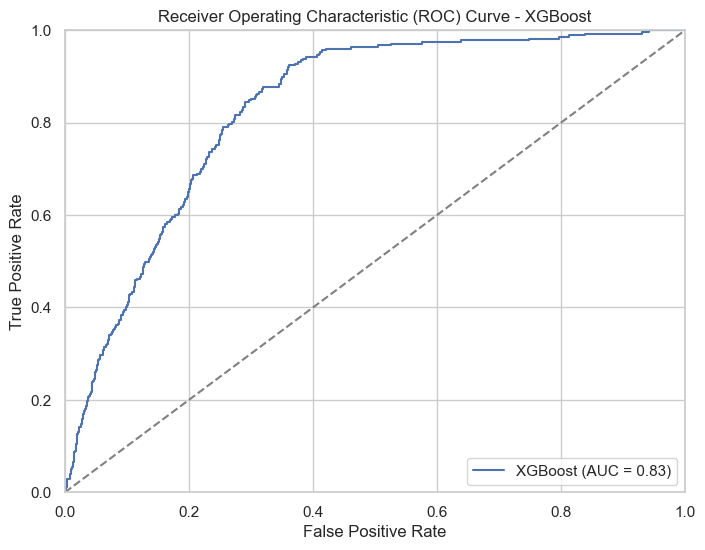

In [96]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='XGBoost (AUC = {:.2f})'.format(roc_score_gb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [97]:
# Print accuracy
print("Accuracy - Gradient Boosting: {:.2f}".format(accuracy_gb))

Accuracy - Gradient Boosting: 0.94
